## Cargar librerías y la base de datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base
df = pd.read_csv("df_unificado.csv")

# Vista general
print(df.shape)
df.head()


(7048, 110)


,anio_graduacion,grado_academico,disciplina,ingresos,relacion_estudios,ingles,frances,portugues,aleman,italiano,...,necesidades_atencion_1,necesidades_atencion_2,analisis_sintesis_1,analisis_sintesis_2,trab_bajo_presion_1,trab_bajo_presion_2,CANTON_SEDE,G11_Otro,bases_progama_1,bases_progama_2
0,2012,Licenciatura,Diseño Gráfico,674121.5,4.0,Sí,Sí,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Licenciatura,Diseño Gráfico,674121.5,4.0,Sí,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,Bachillerato,Diseño Gráfico,674121.5,NaN,Sí,No,No,Sí,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,Licenciatura,Diseño Gráfico,674121.5,NaN,Sí,No,Sí,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,Licenciatura,Diseño Gráfico,674121.5,NaN,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Cantidad total de registros
total_registros = df.shape[0]
print(f"Cantidad total de registros: {total_registros}")

Cantidad total de registros: 7048


In [10]:
# Cantidad de registros por año
conteo_anual = df['anio_graduacion'].value_counts().sort_index()

print("\nCantidad de registros por año:")
print(conteo_anual)



Cantidad de registros por año:
anio_graduacion
2011     622
2012     875
2013    1047
2014     873
2015     804
2016     791
2017     646
2018     661
2019     729
Name: count, dtype: int64


## Análisis de variables categóricas – Frecuencias y proporciones

In [3]:
# Identificar variables categóricas
cat_vars = df.select_dtypes(include='object').columns

# Frecuencias absolutas y relativas
for col in cat_vars:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(3))


--- GRADO_ACADEMICO ---
grado_academico
Bachillerato    4002
Licenciatura    3046
Name: count, dtype: int64
grado_academico
Bachillerato    0.568
Licenciatura    0.432
Name: proportion, dtype: float64

--- DISCIPLINA ---
disciplina
Administración                  903
Contaduría                      745
Finanzas                        628
Ecología                        582
Ingeniería Industrial           521
Comercio Internacional          496
Diseño Gráfico                  437
Ingeniería Mecánica             433
Química                         380
Ingeniería Electrónica          357
Ingeniería del Software         355
Inglés                          297
Ciencias de la Computación      157
Desarrollo de Software          151
Informática Generalista         143
Ingeniería Química              114
Ingeniería de Materiales        104
Microbiología                    99
Estadística                      87
Ingeniería de los Materiales     59
Name: count, dtype: int64
disciplina
Administra

## Análisis de variables numéricas – Tendencia central y dispersión

In [4]:
# Identificar variables numéricas
num_vars = df.select_dtypes(include=np.number).columns

# Estadísticos descriptivos
df[num_vars].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
anio_graduacion,7048.0,2014.84,2.49,2011.0,2013.0,2015.0,2017.0,2019.0
ingresos,7048.0,922863.47,184431.98,579167.0,786537.0,882468.5,1063542.0,1628800.0
relacion_estudios,1702.0,4.27,1.14,1.0,4.0,5.0,5.0,5.0
A6_1_1,2155.0,3.99,0.91,1.0,3.0,4.0,5.0,5.0
A6_1_2,2155.0,3.62,1.06,1.0,3.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
trab_bajo_presion_1,4144.0,4.01,1.13,1.0,3.0,4.0,5.0,5.0
trab_bajo_presion_2,4144.0,4.58,0.72,1.0,4.0,5.0,5.0,5.0
CANTON_SEDE,2468.0,6.66,9.80,1.0,1.0,1.0,15.0,88.0
bases_progama_1,1845.0,3.07,1.33,1.0,2.0,3.0,4.0,5.0


## Visualización de distribuciones

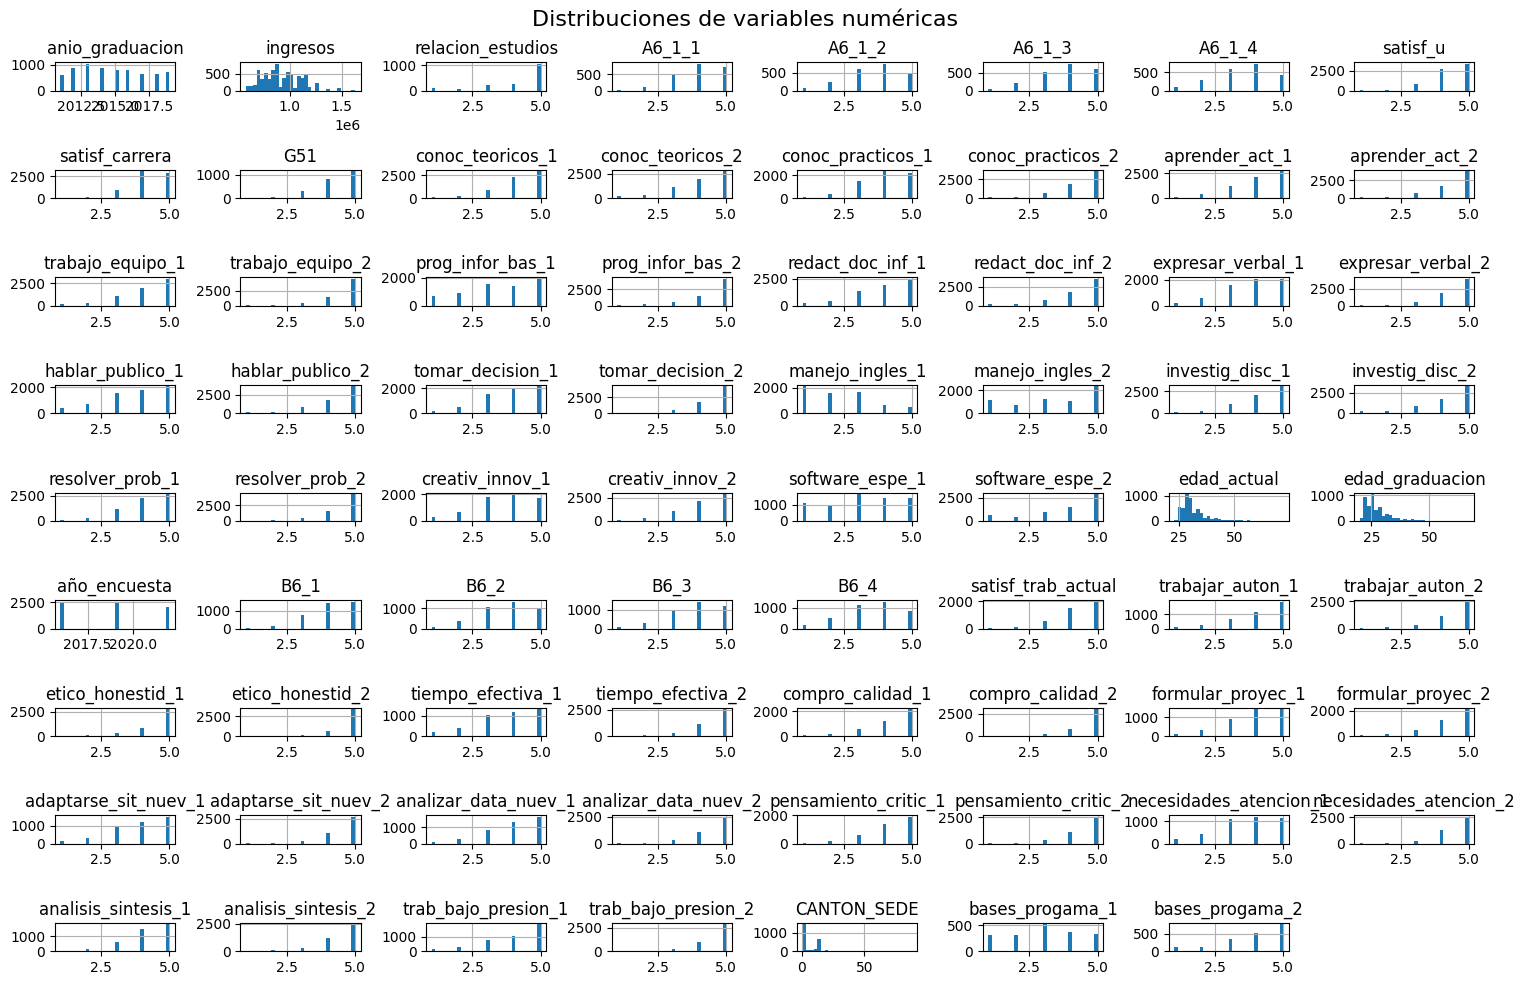

In [5]:
df[num_vars].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()


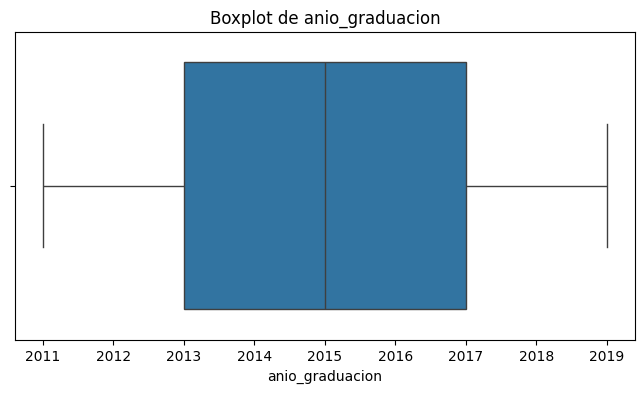

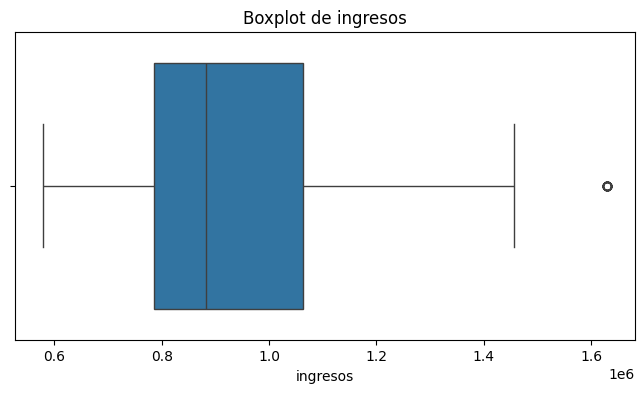

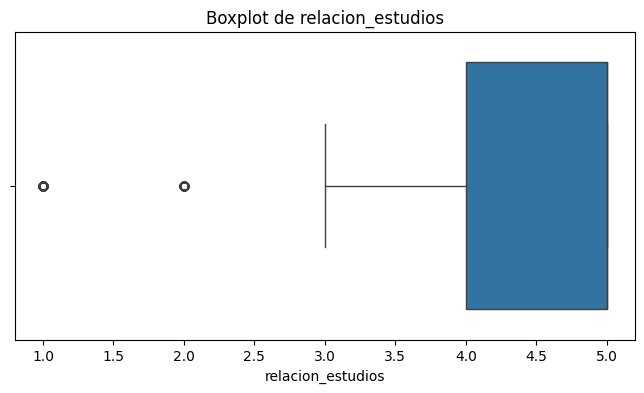

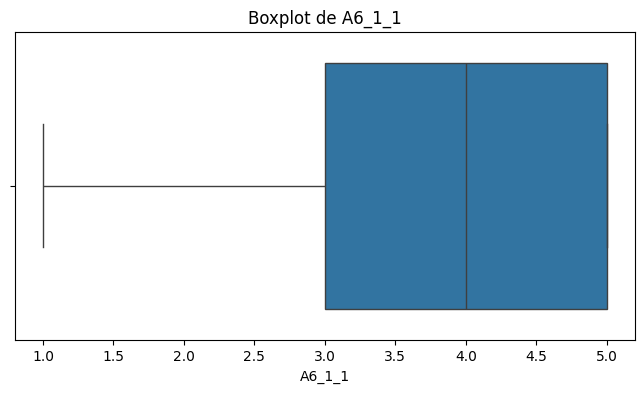

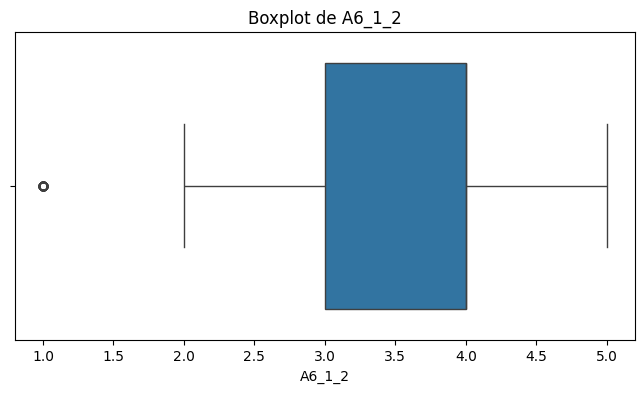

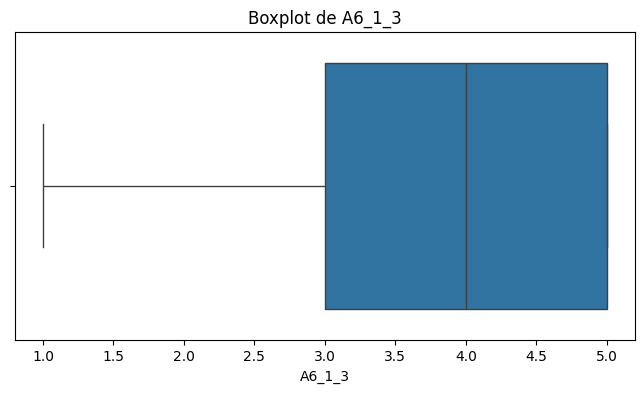

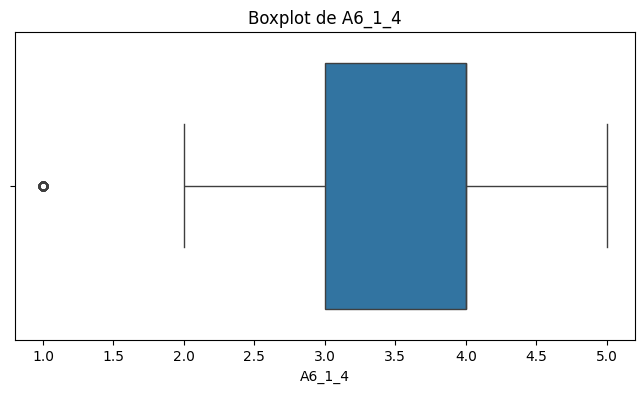

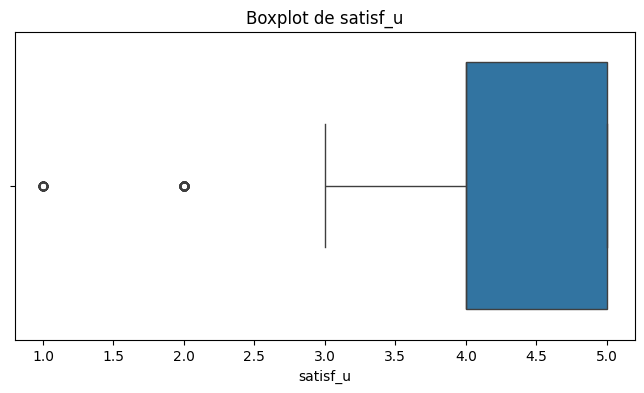

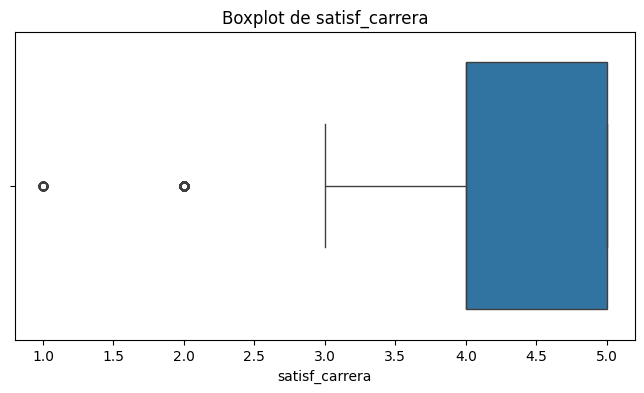

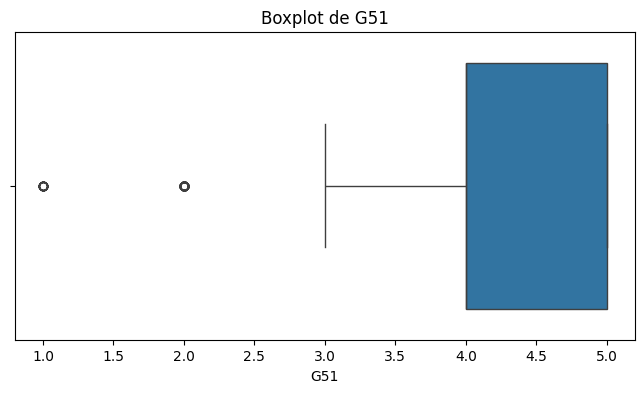

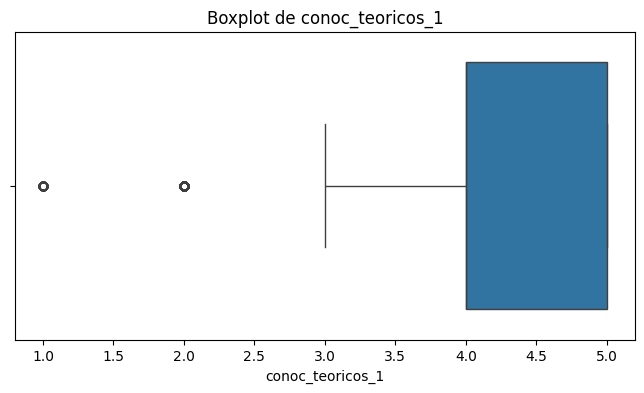

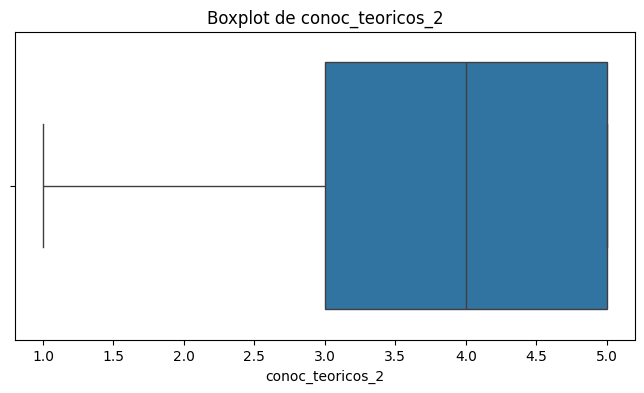

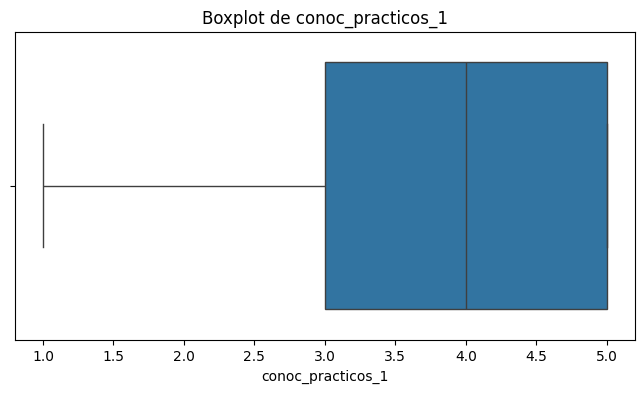

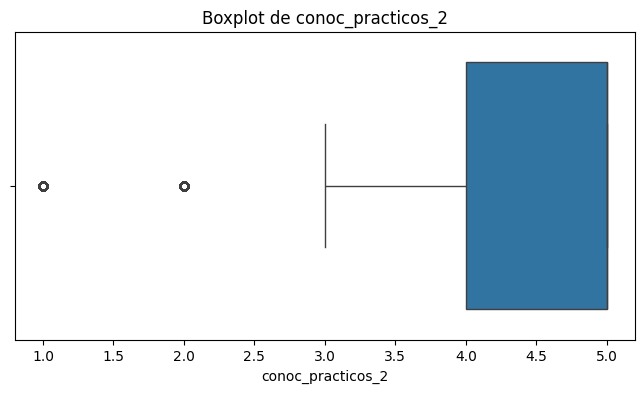

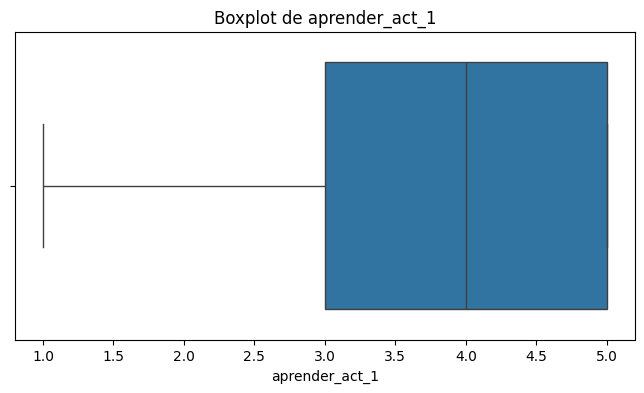

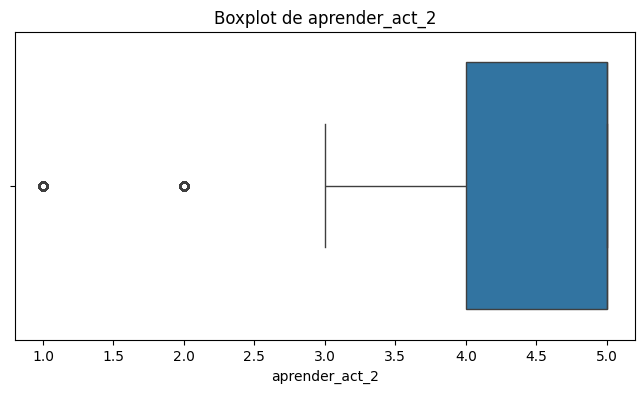

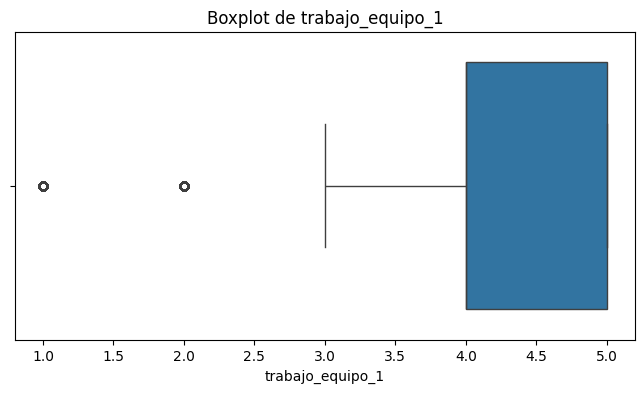

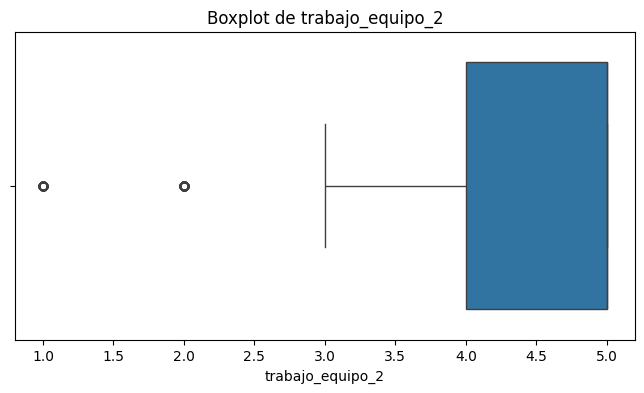

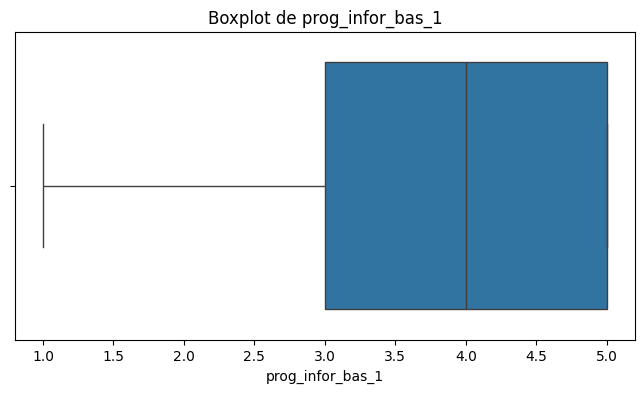

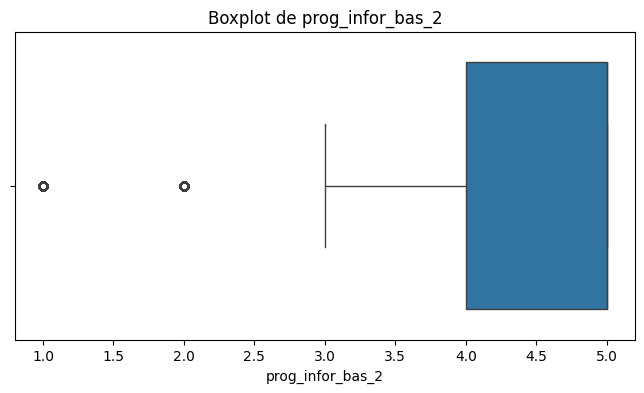

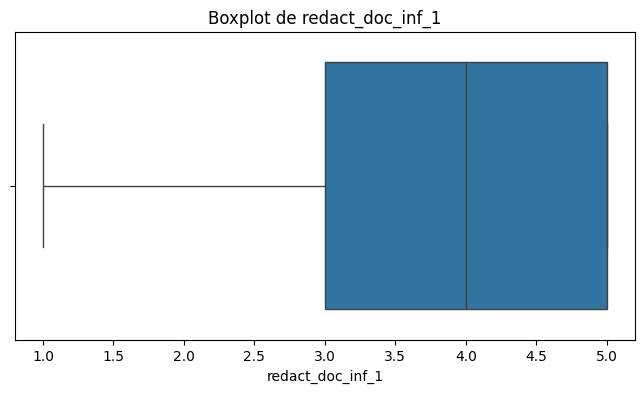

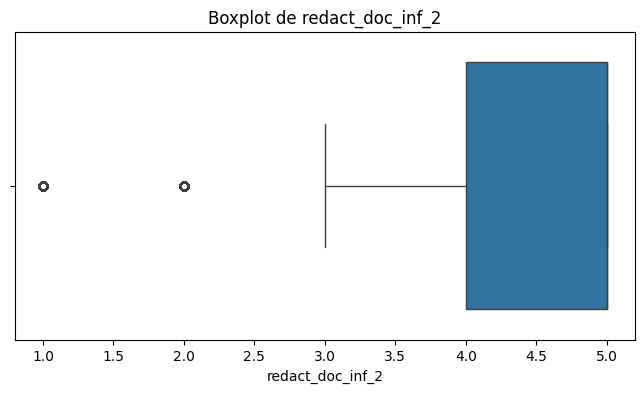

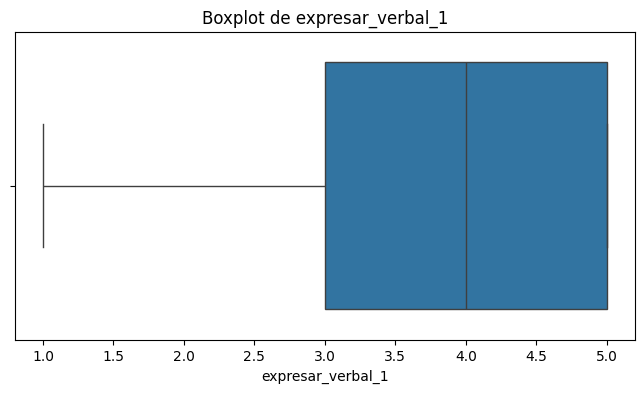

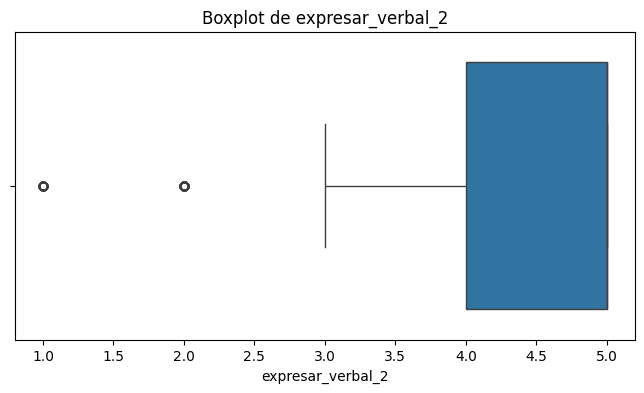

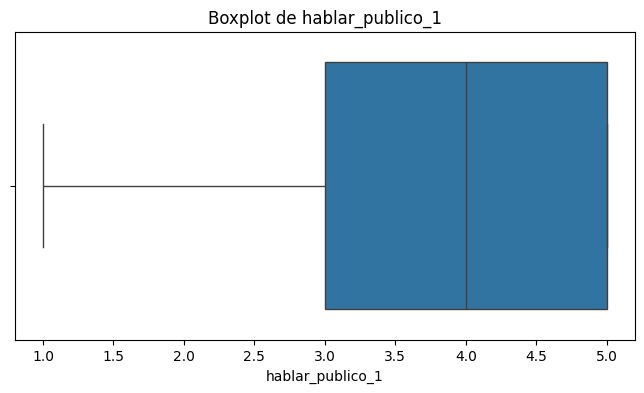

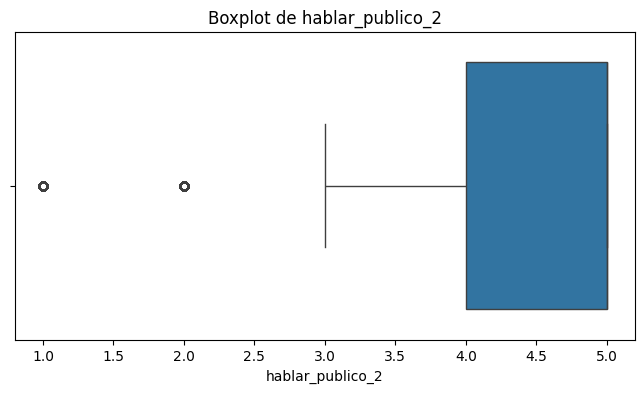

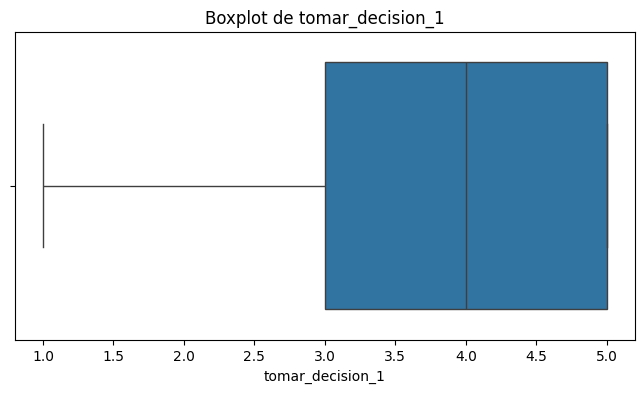

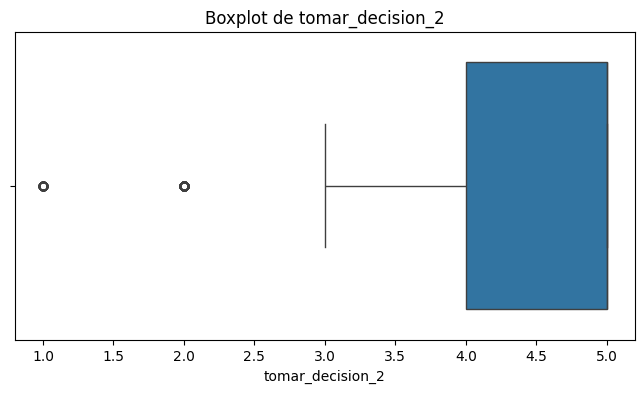

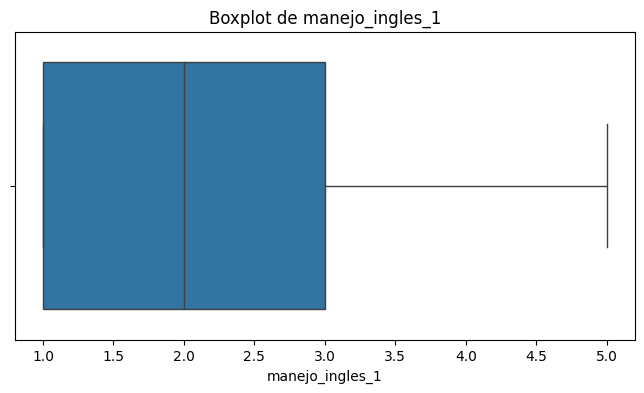

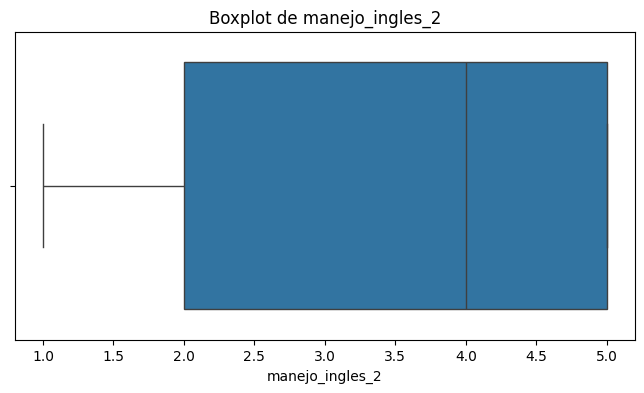

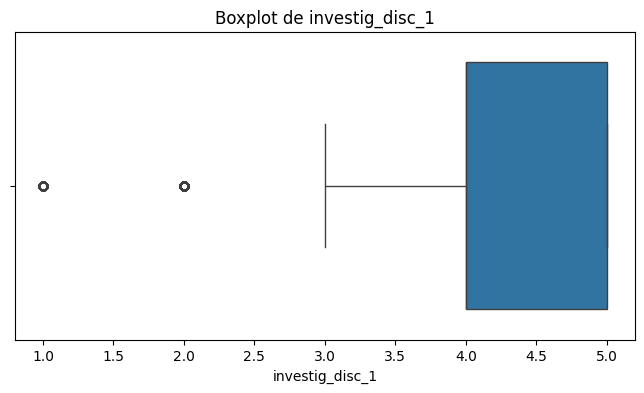

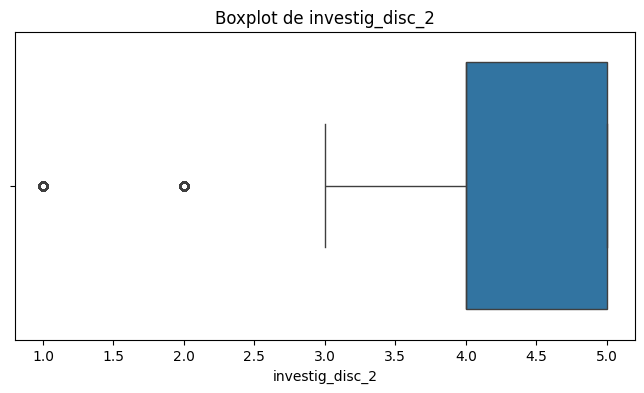

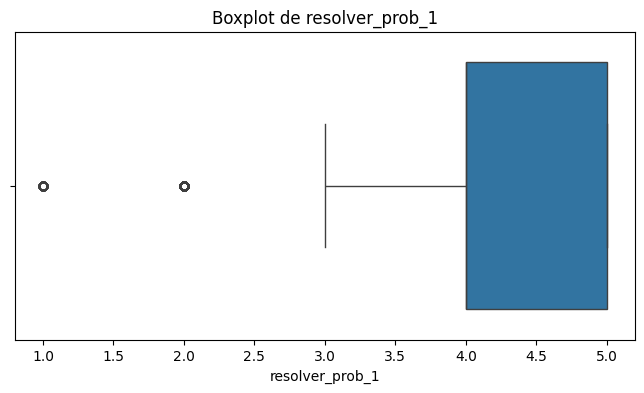

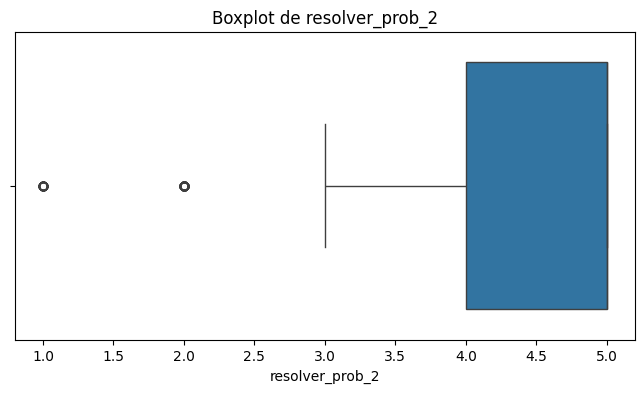

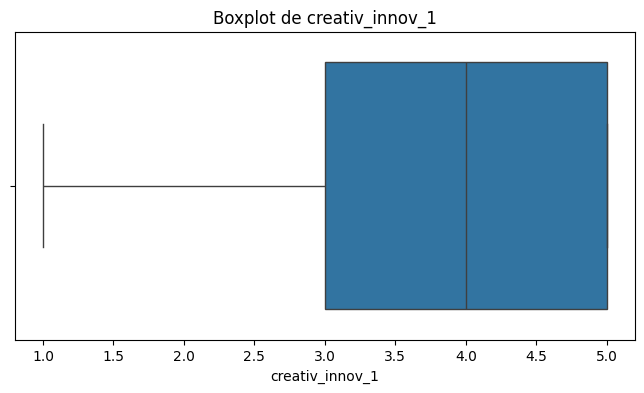

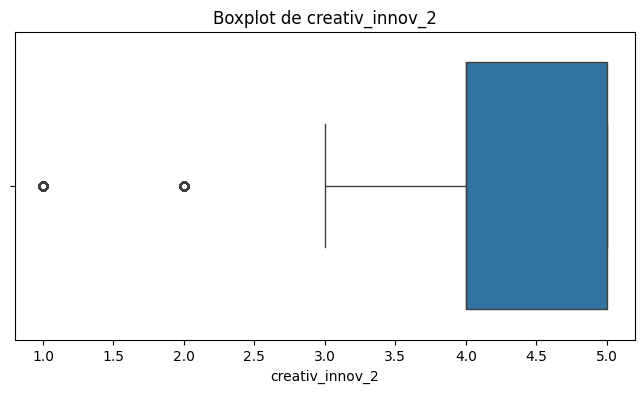

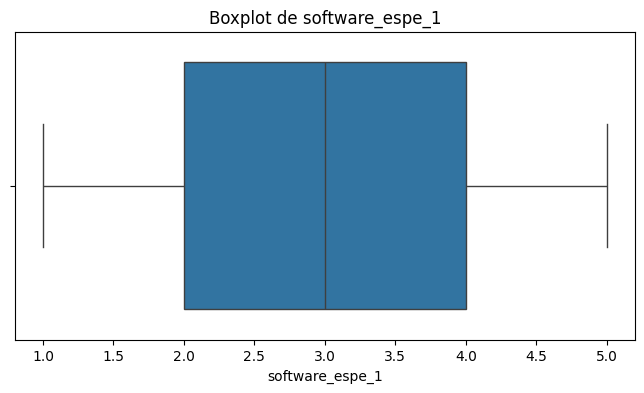

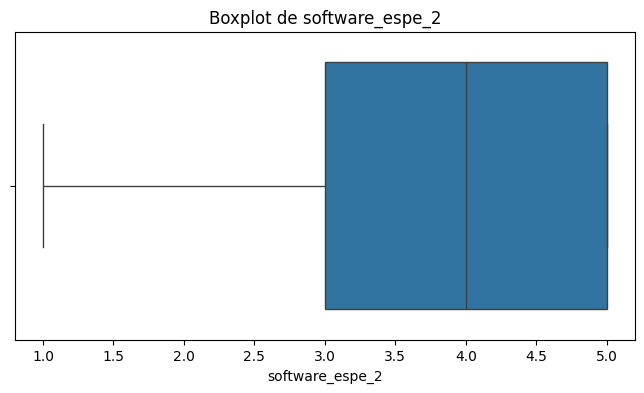

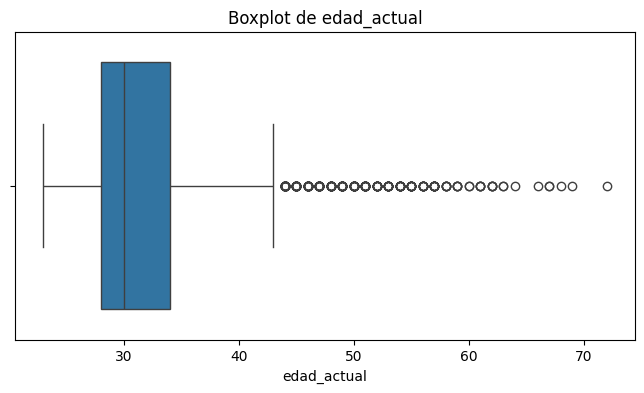

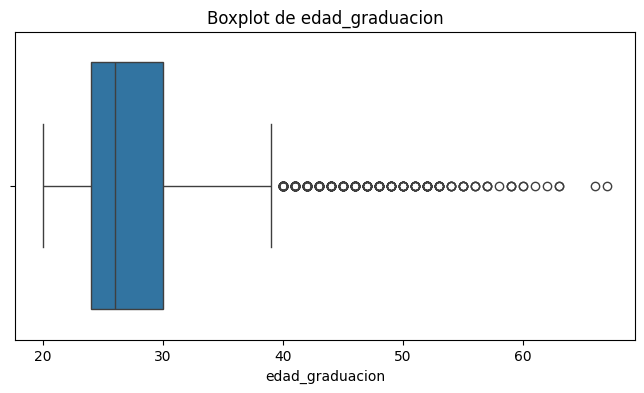

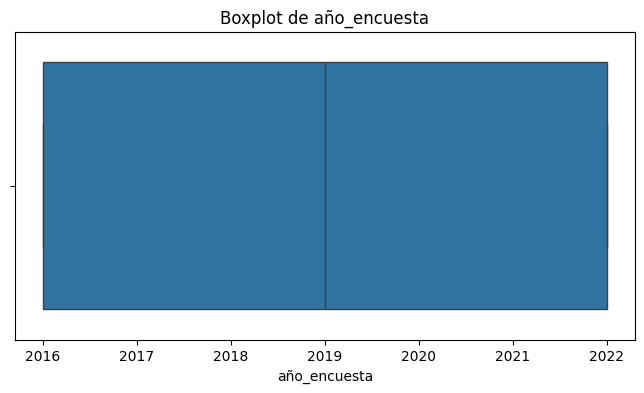

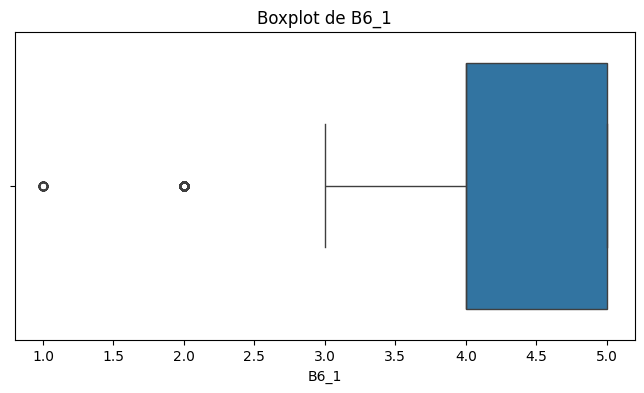

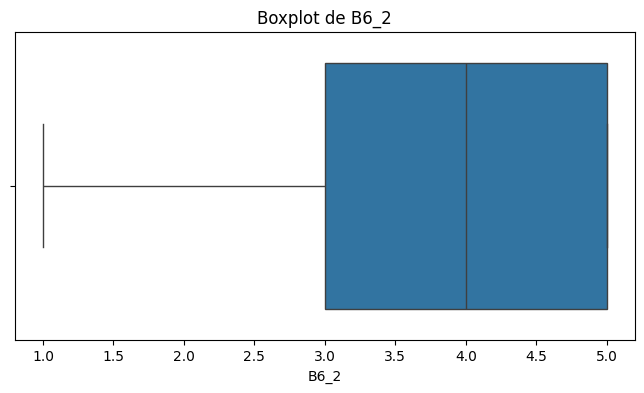

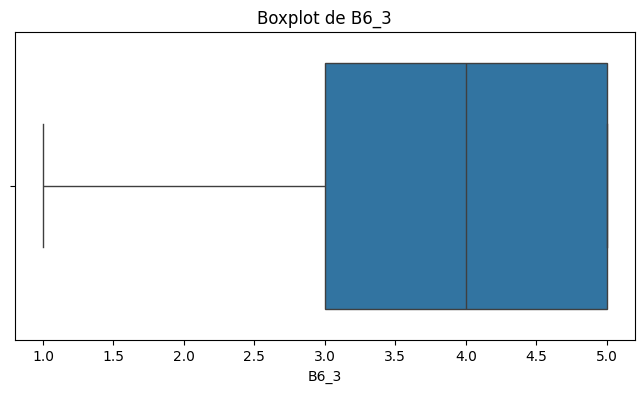

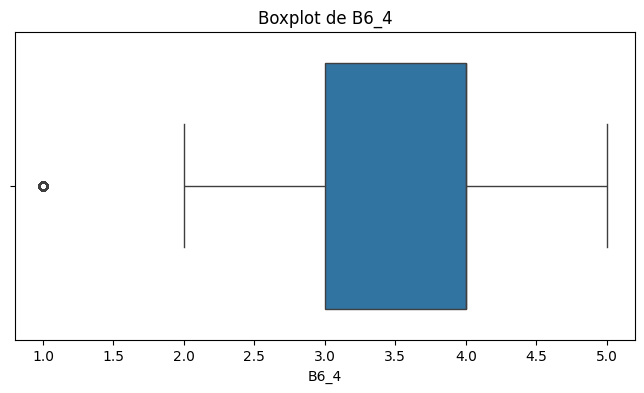

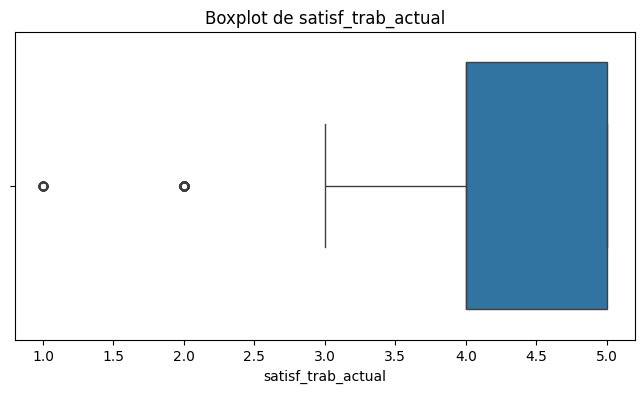

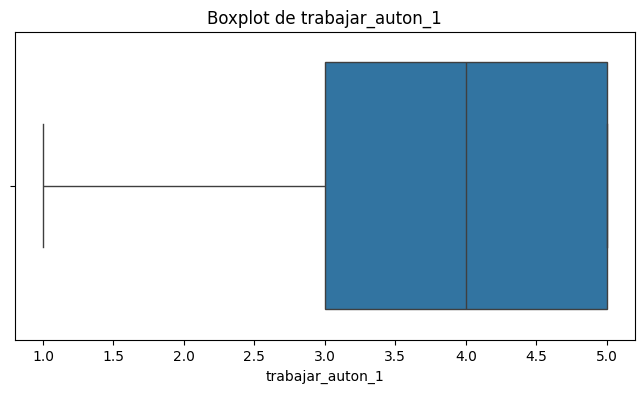

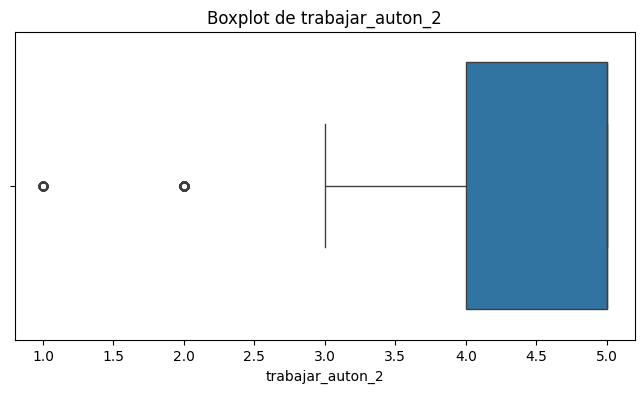

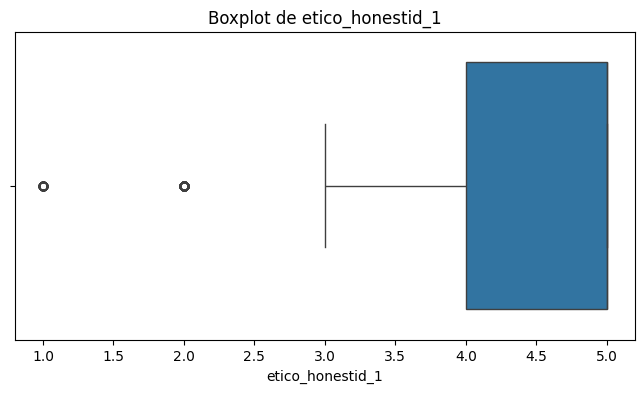

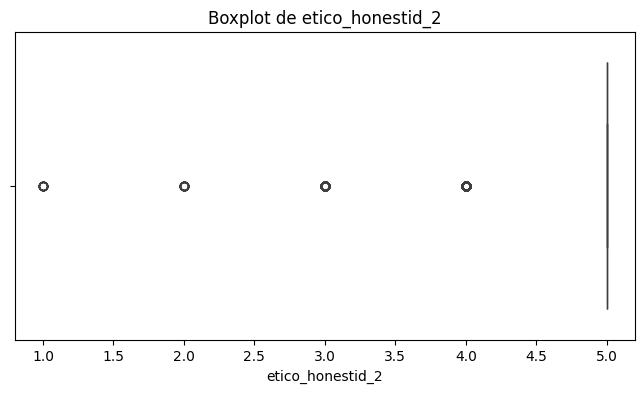

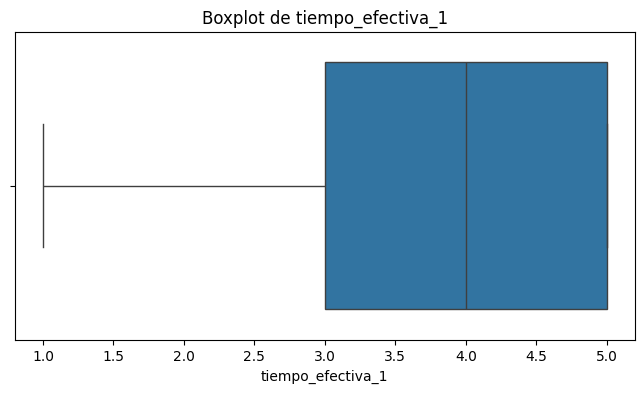

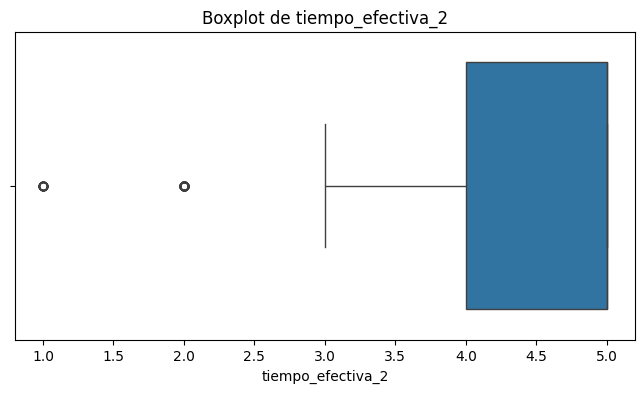

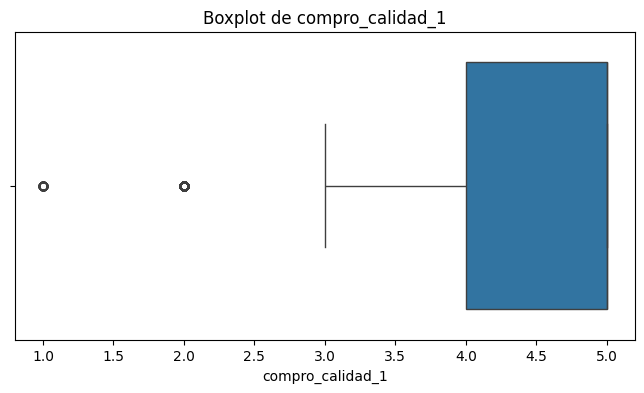

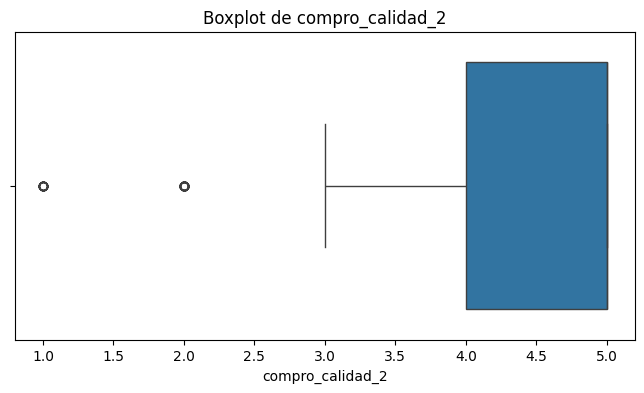

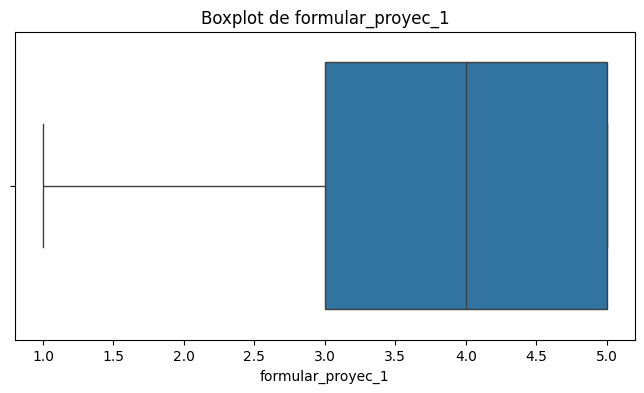

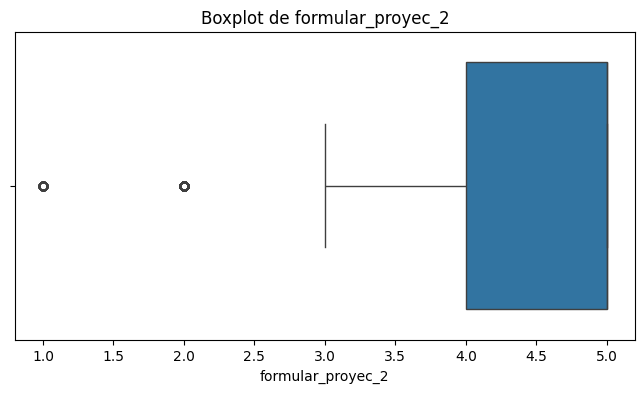

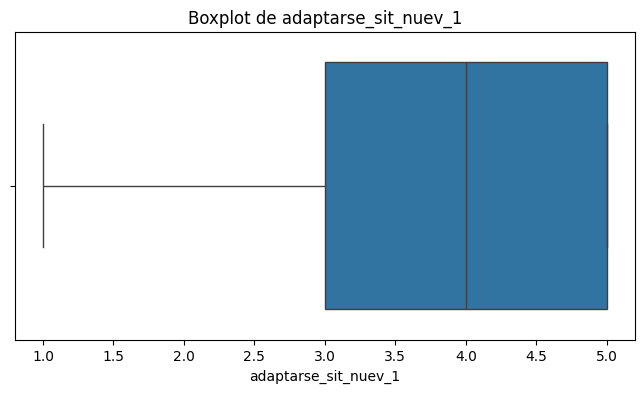

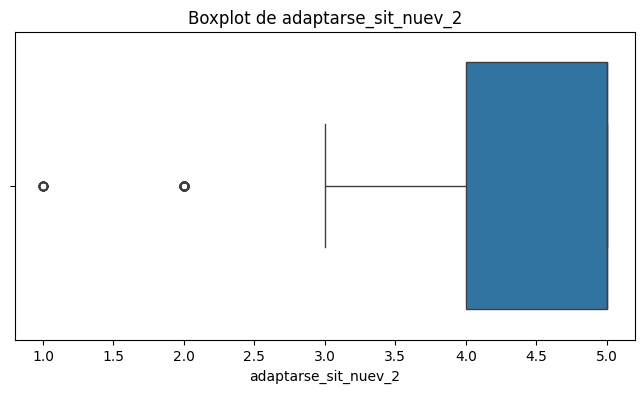

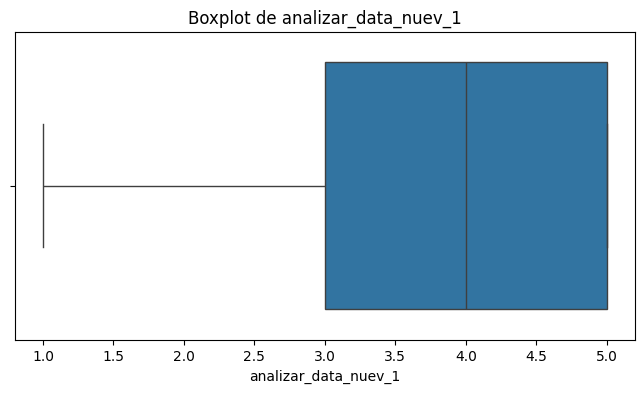

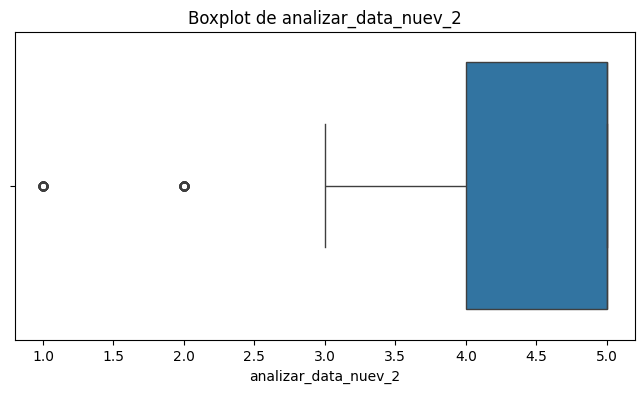

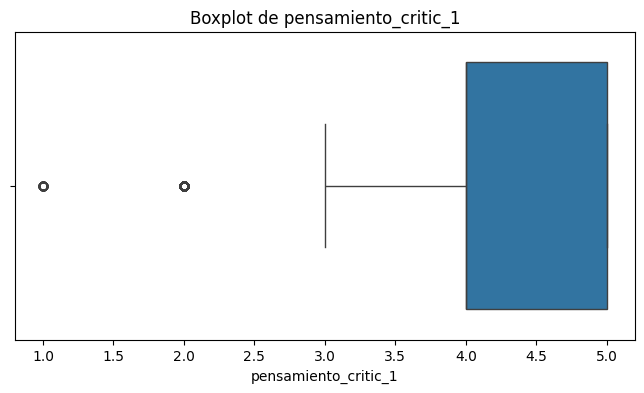

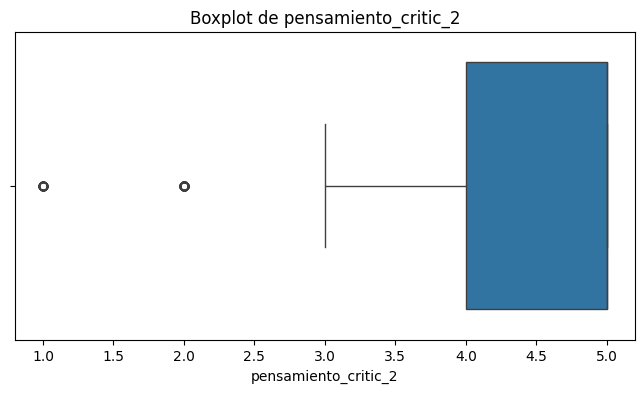

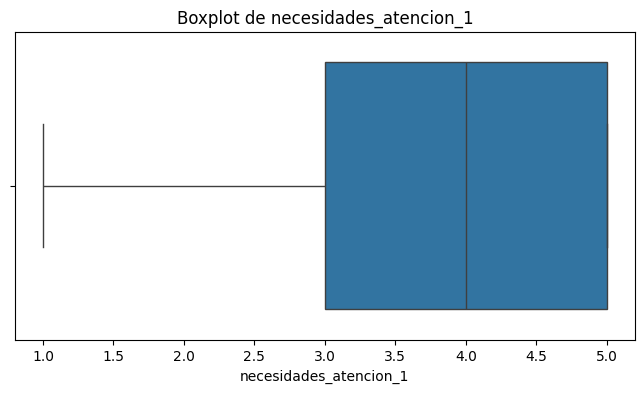

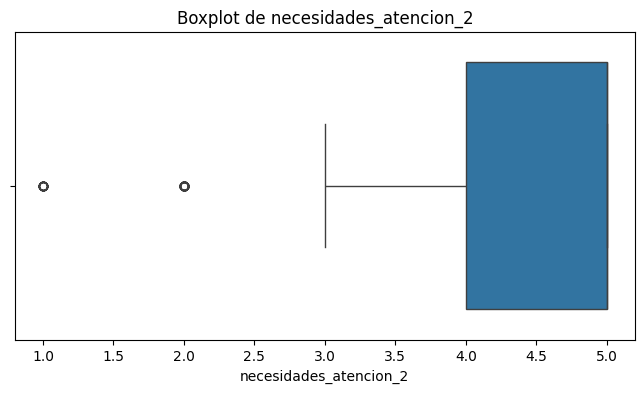

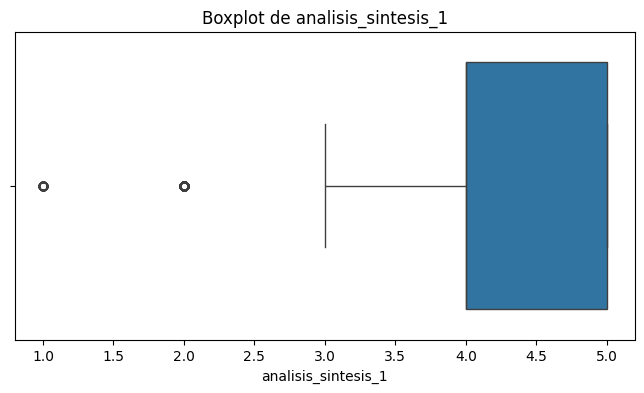

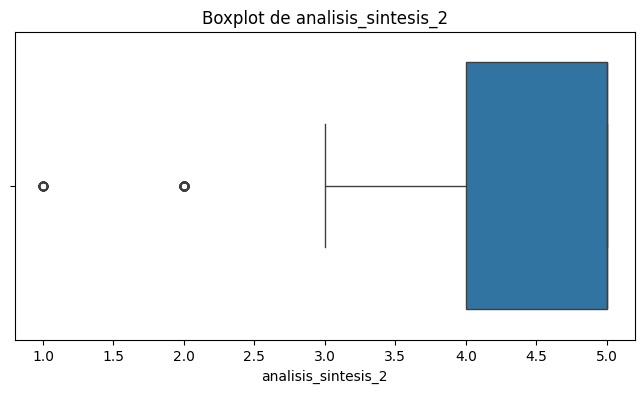

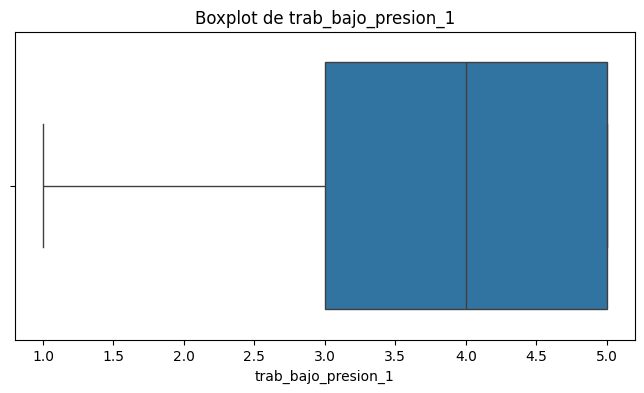

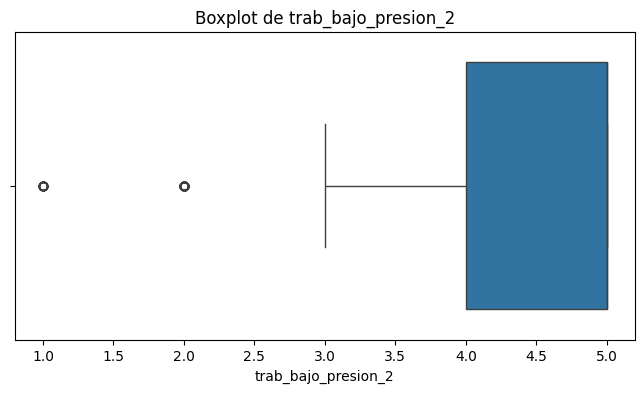

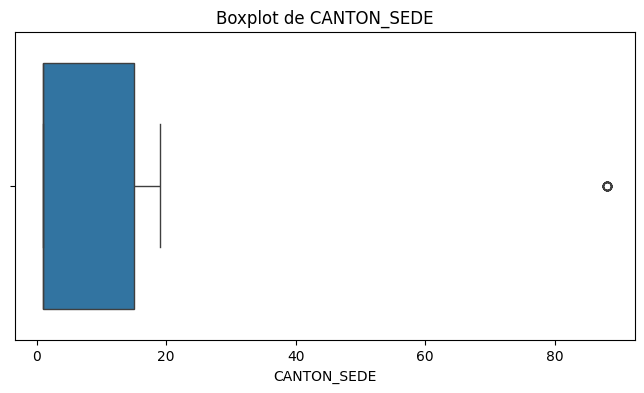

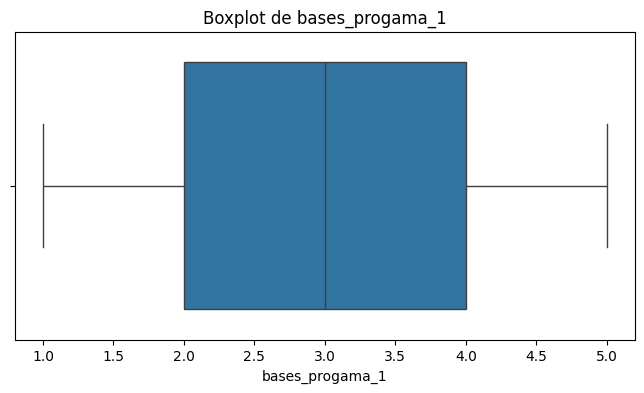

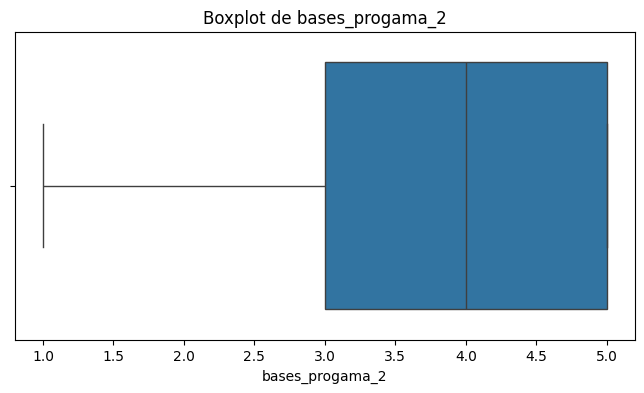

In [6]:
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()


## Distribuciones por grupos (ej. por sexo, tipo de trabajo)

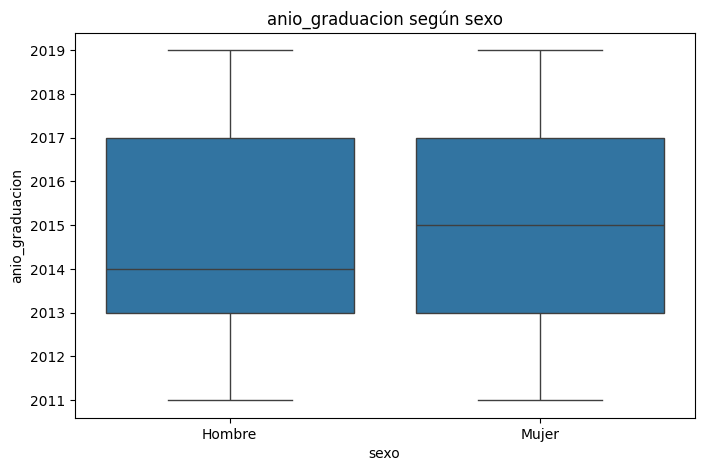

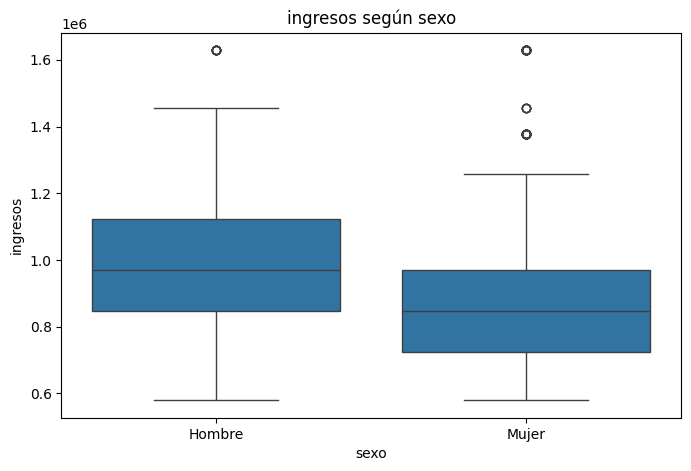

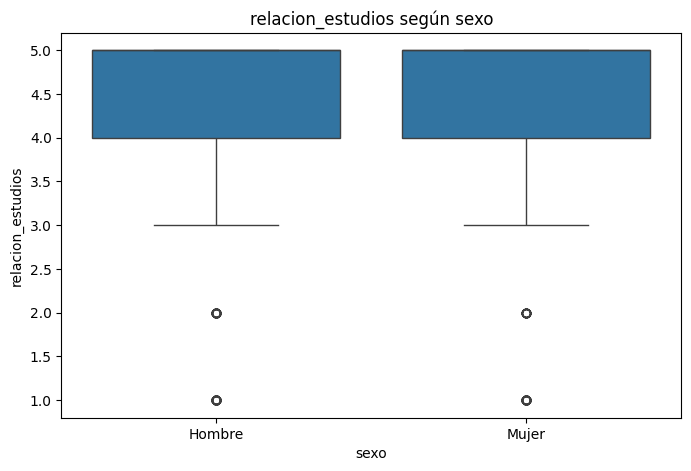

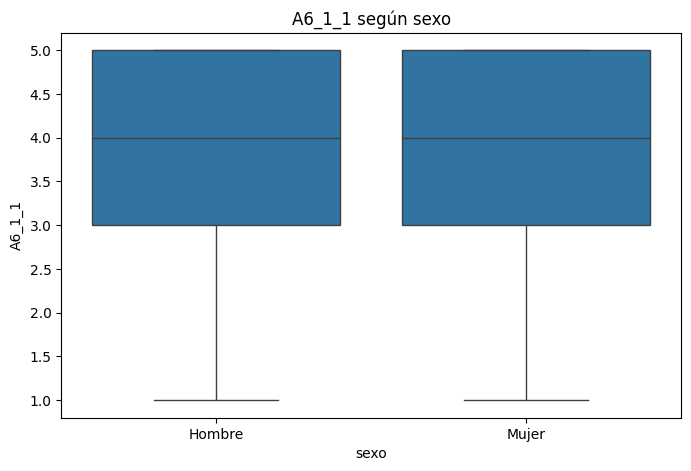

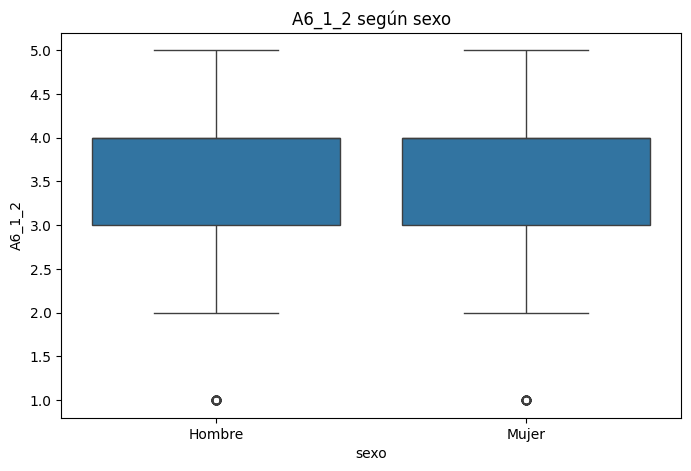

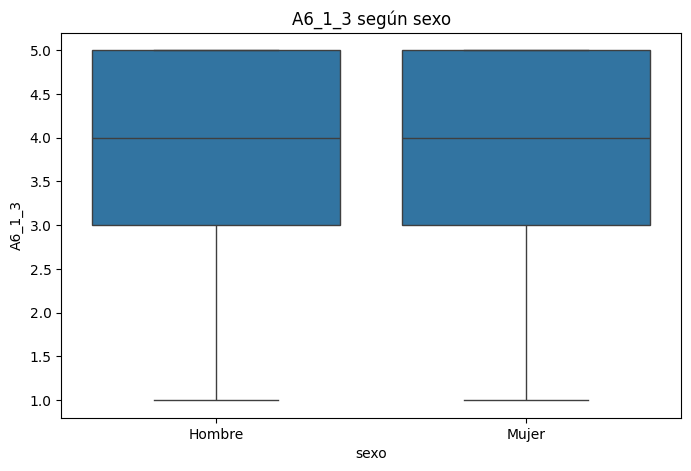

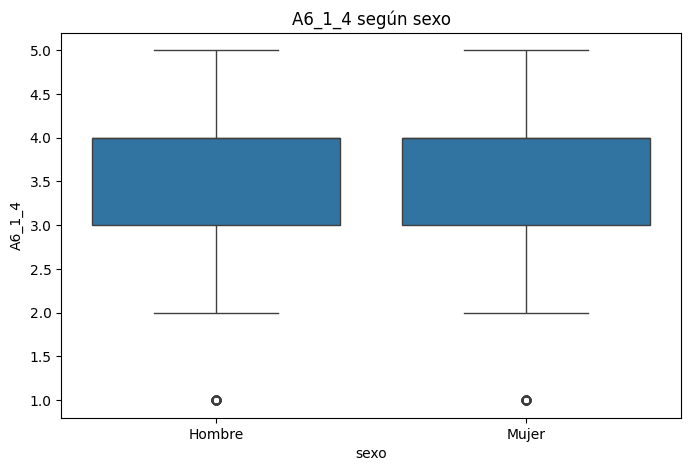

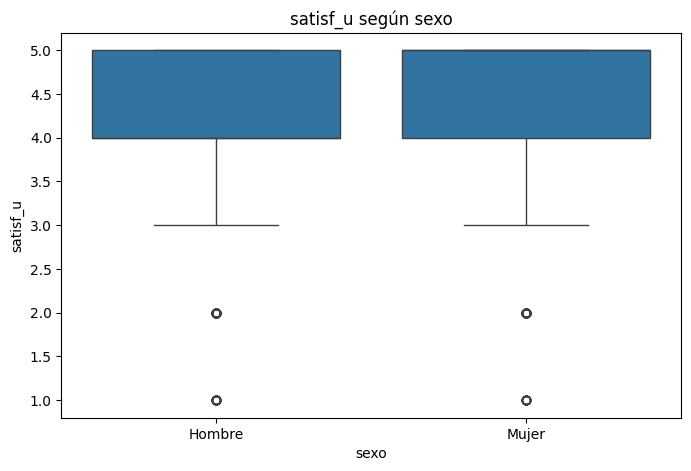

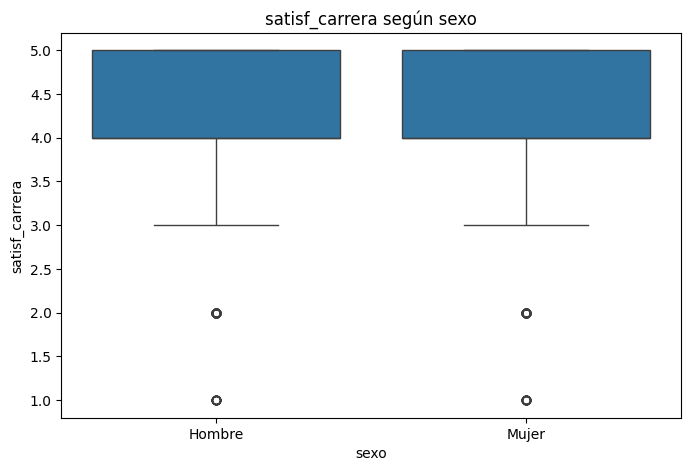

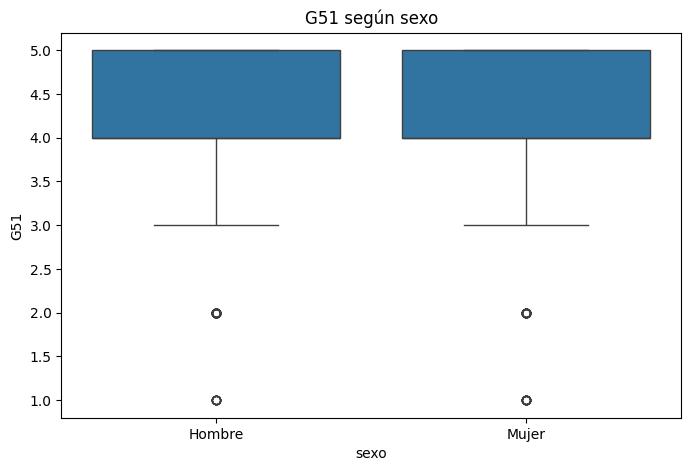

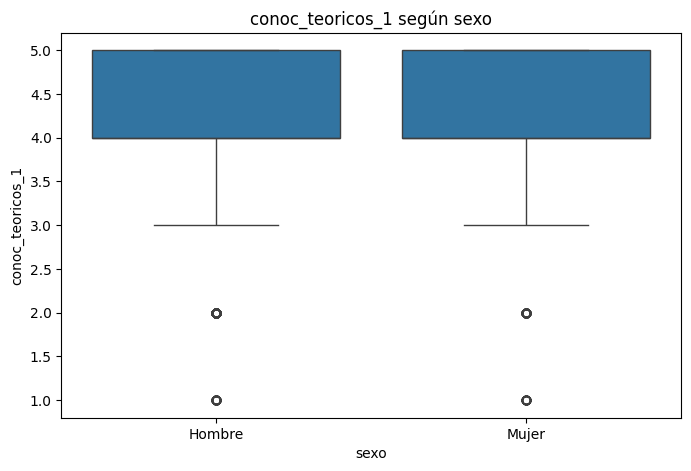

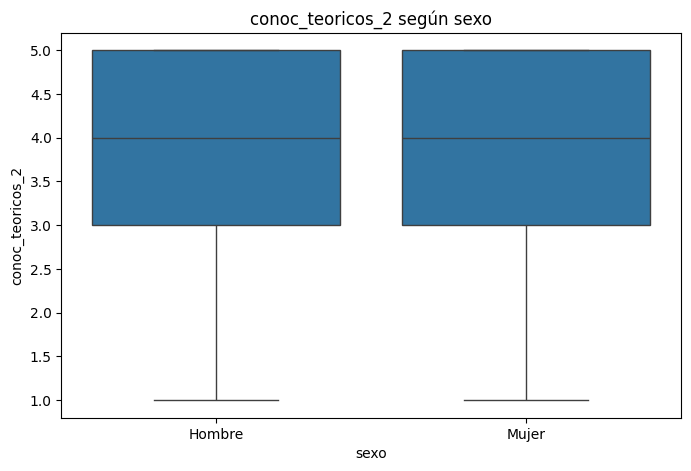

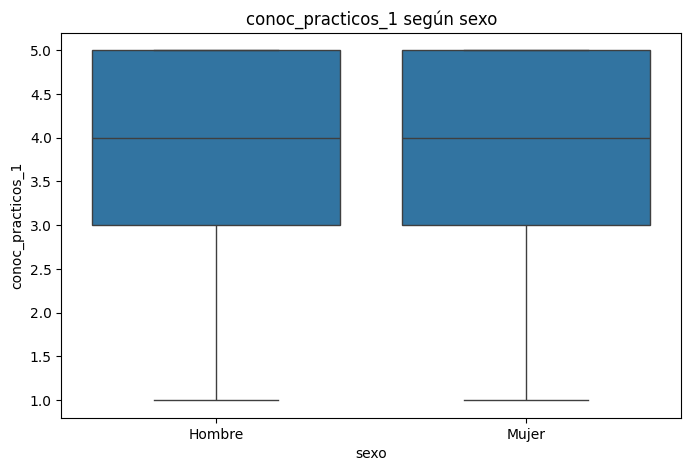

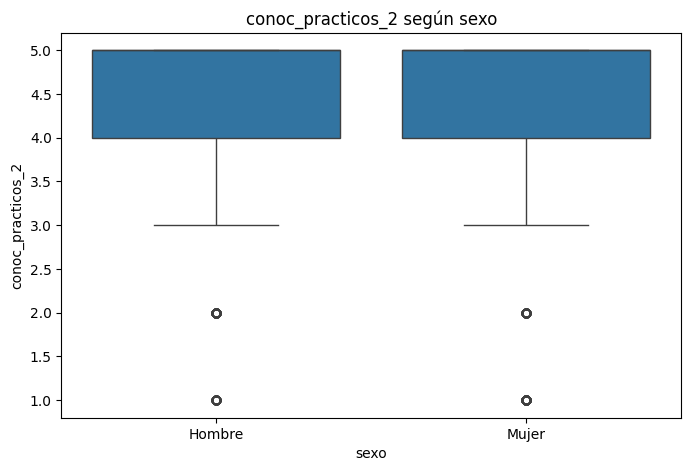

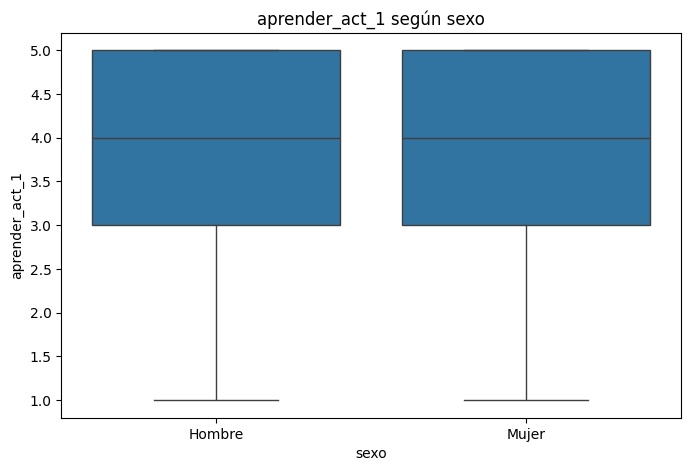

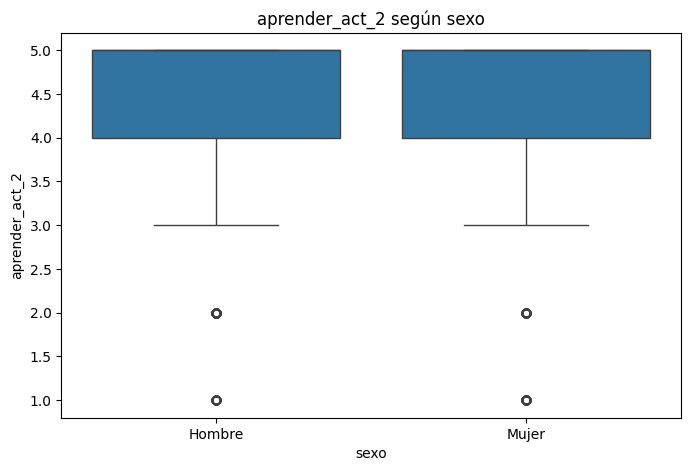

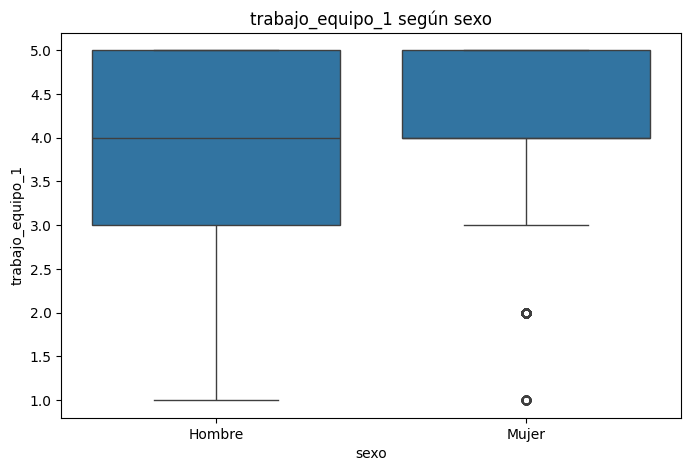

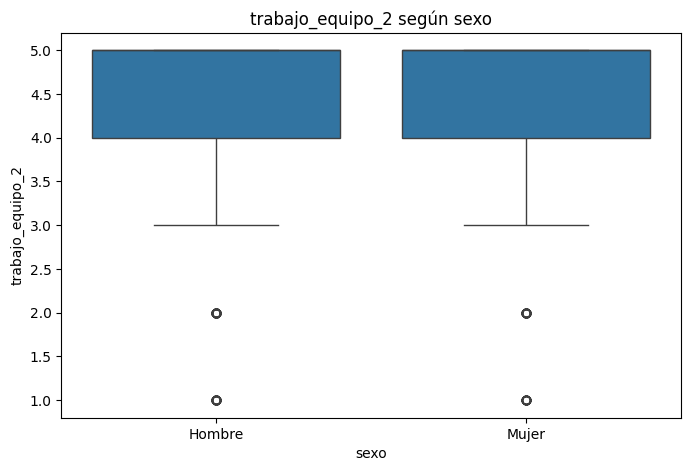

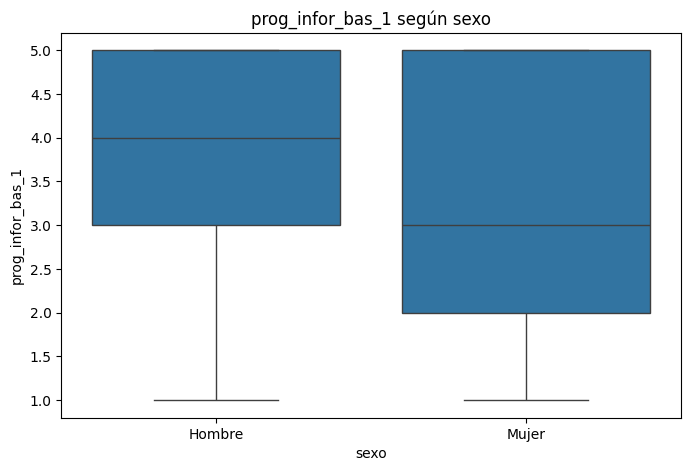

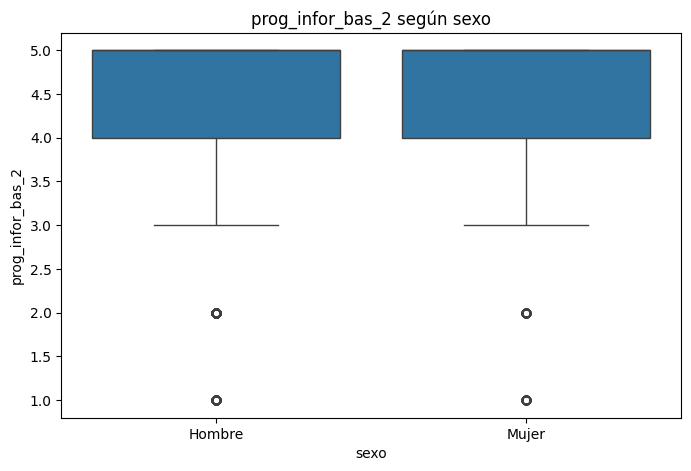

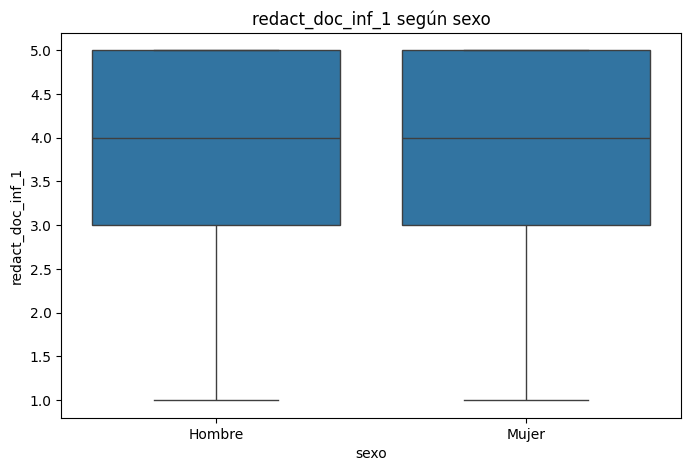

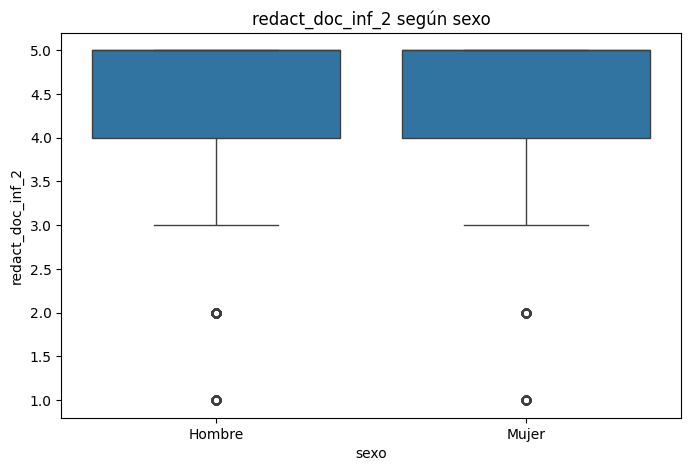

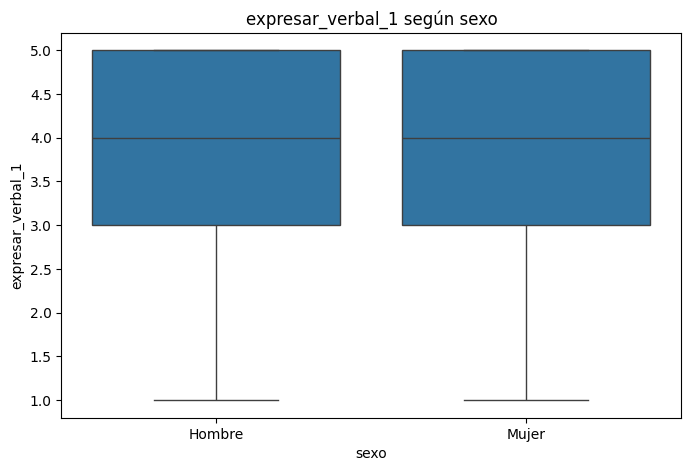

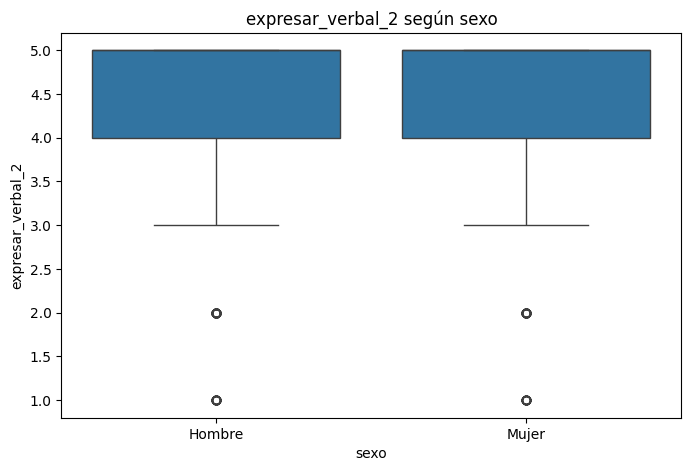

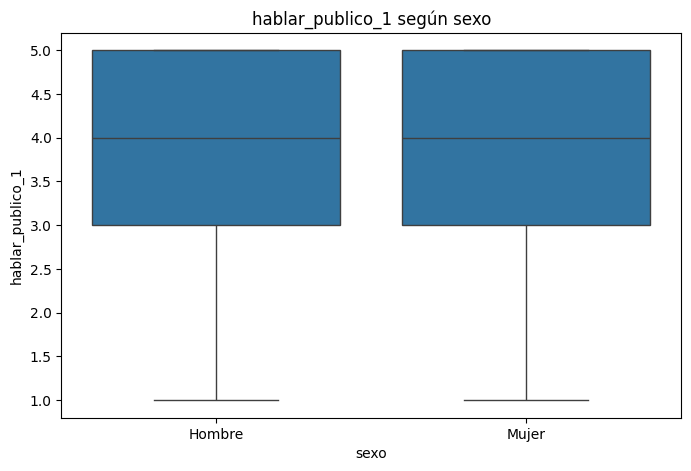

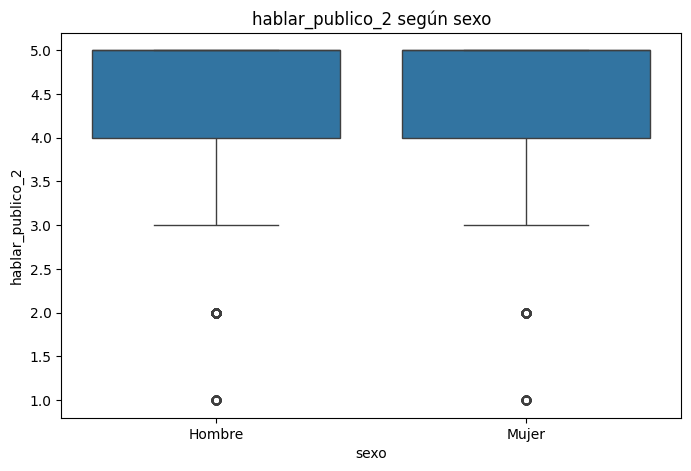

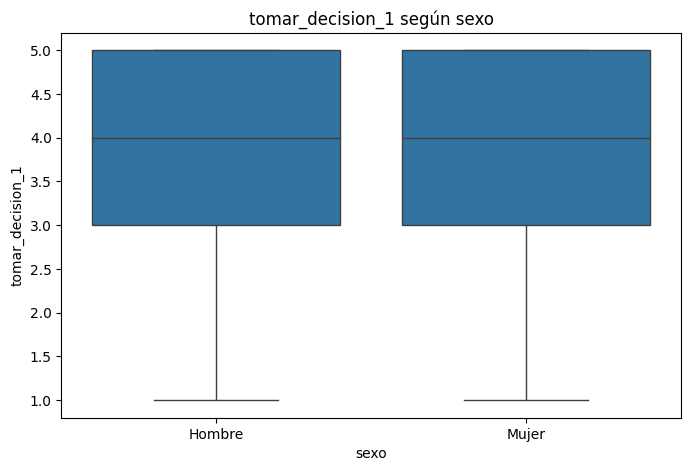

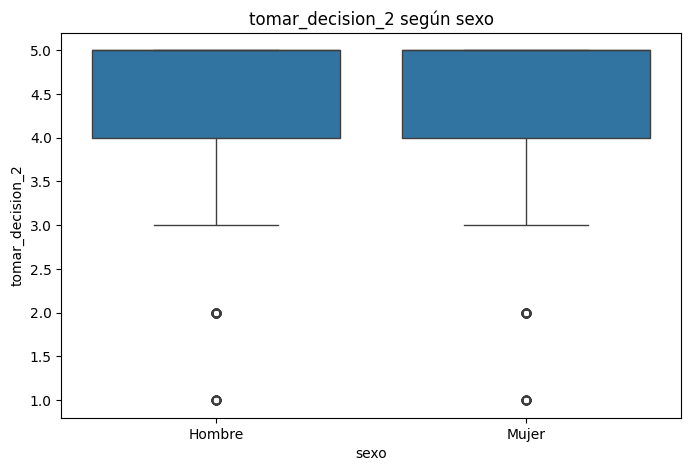

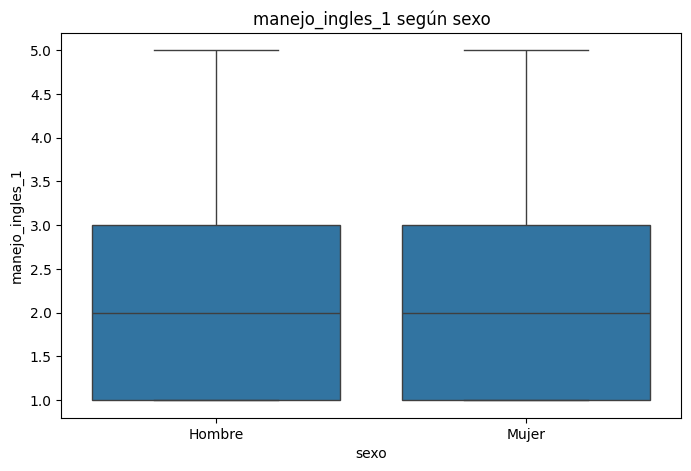

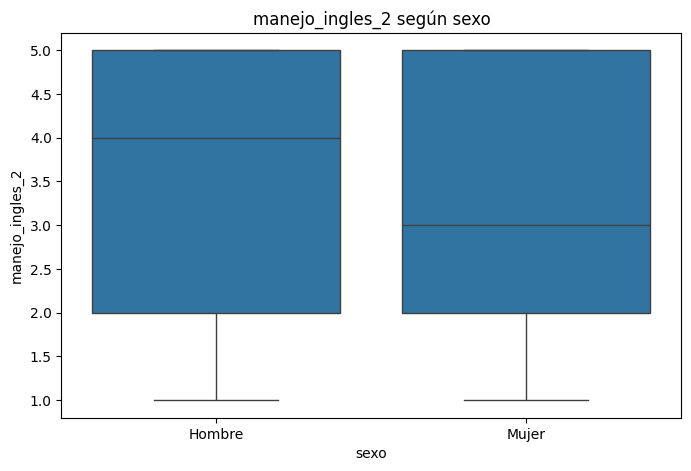

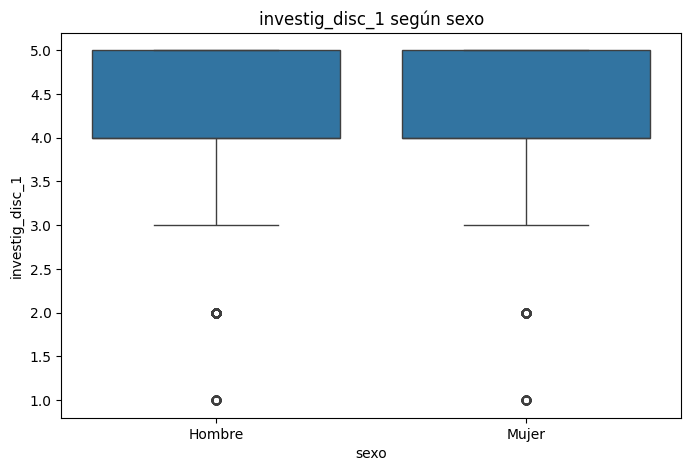

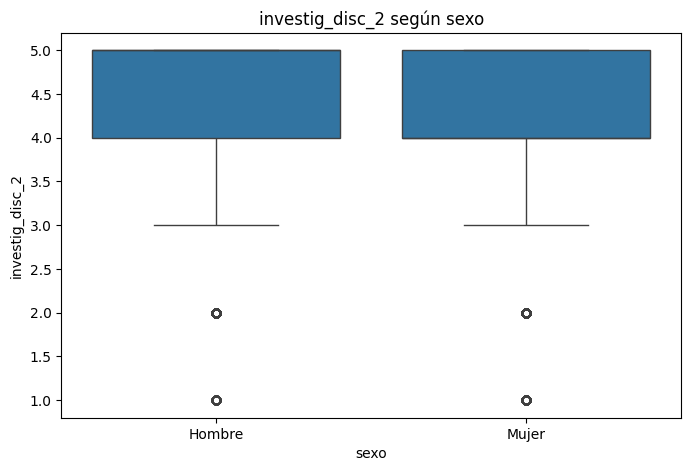

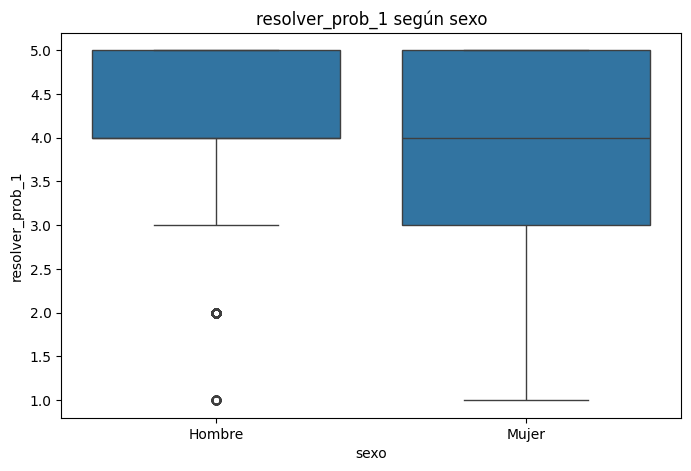

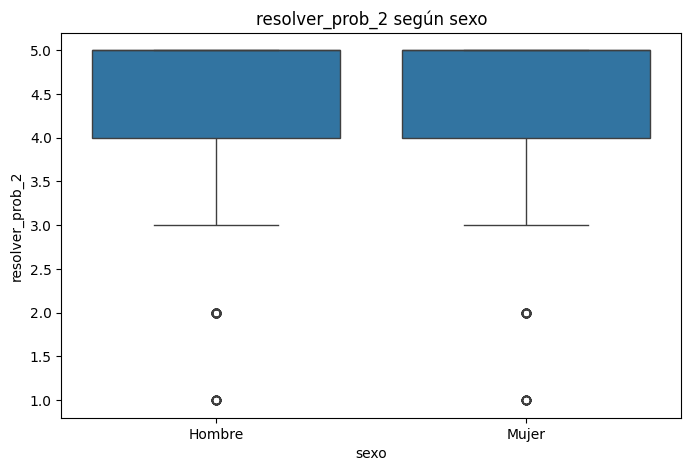

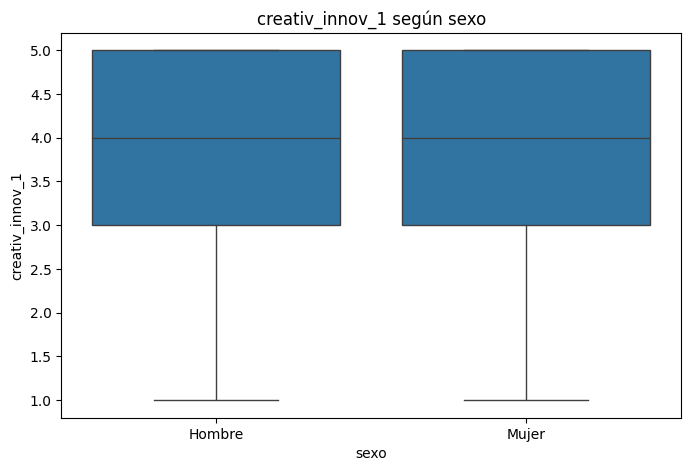

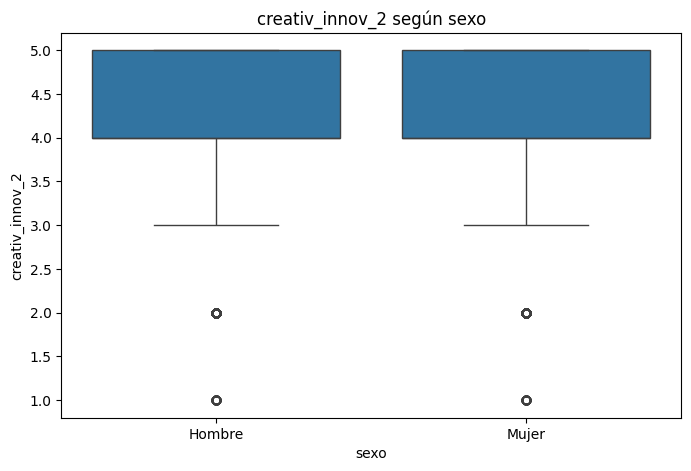

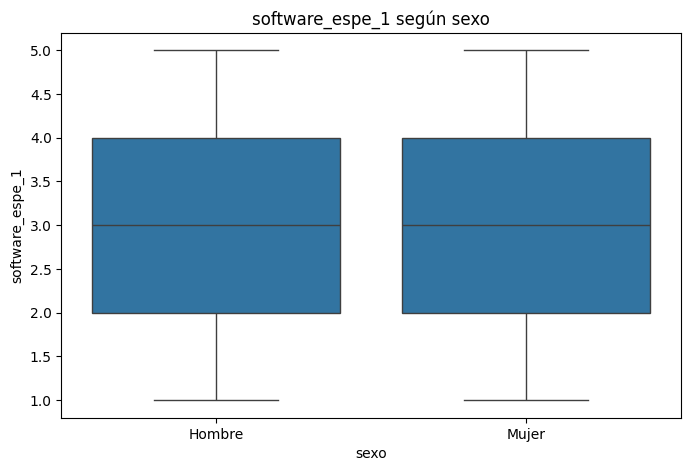

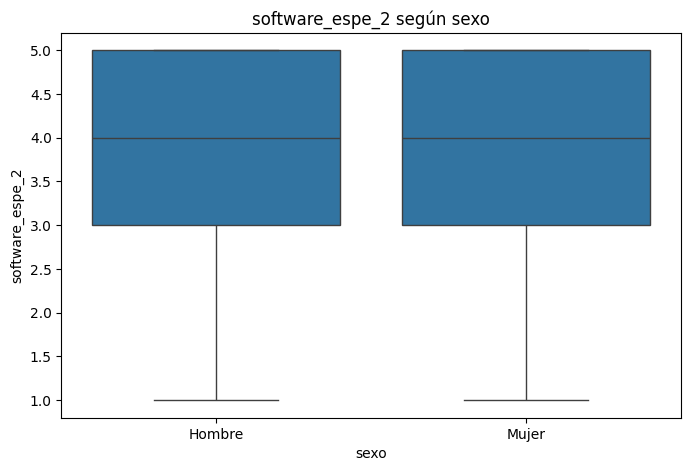

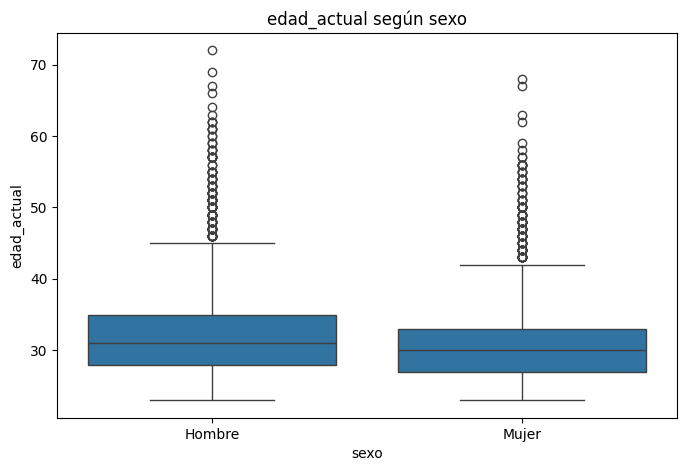

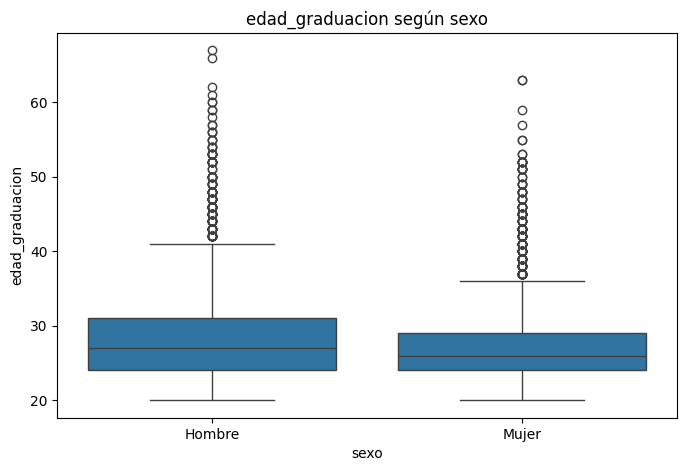

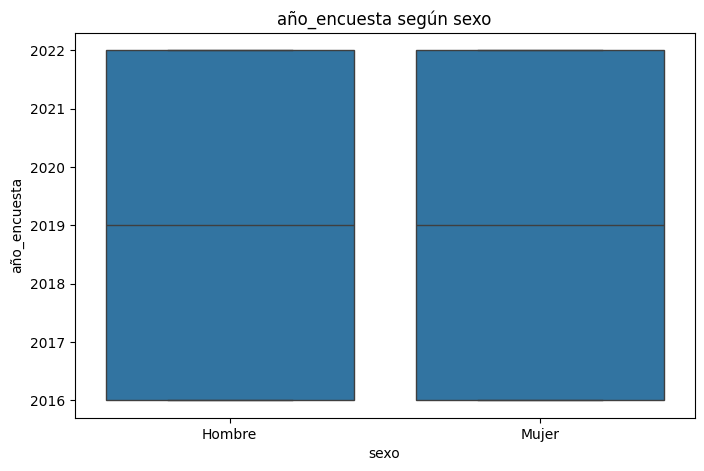

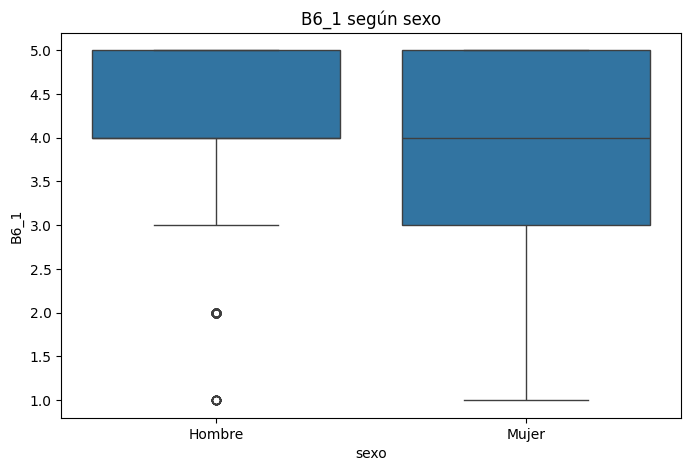

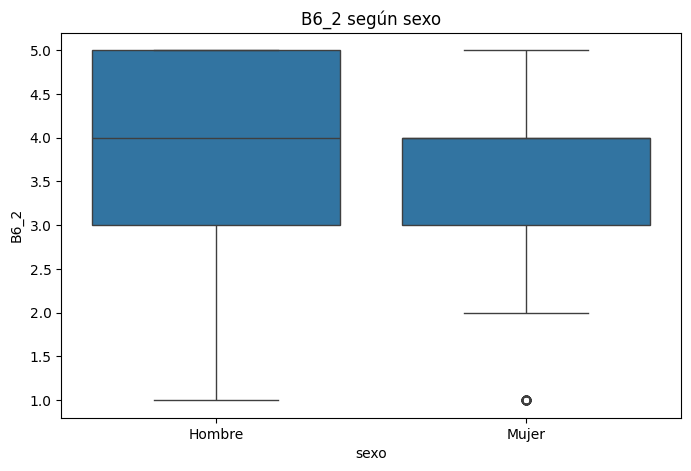

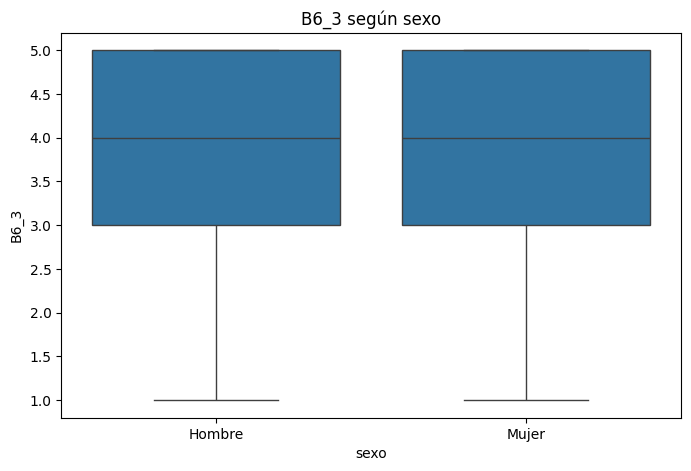

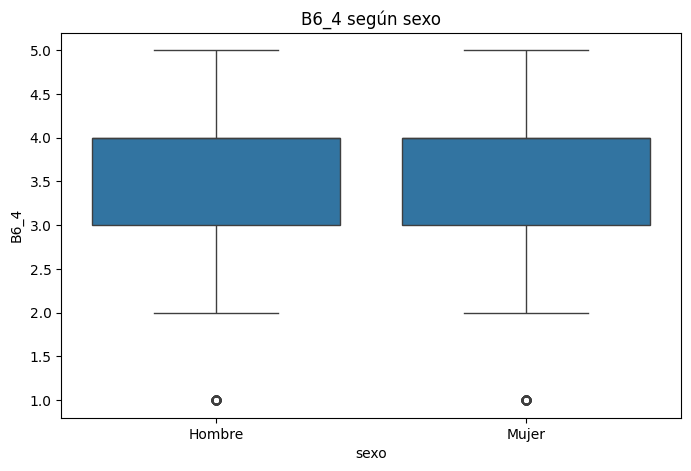

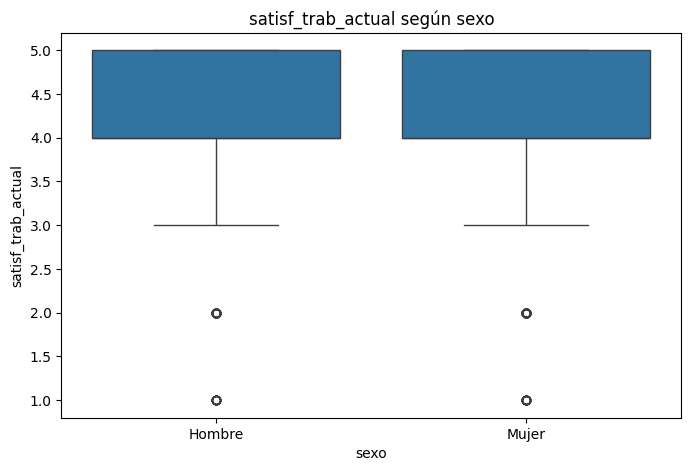

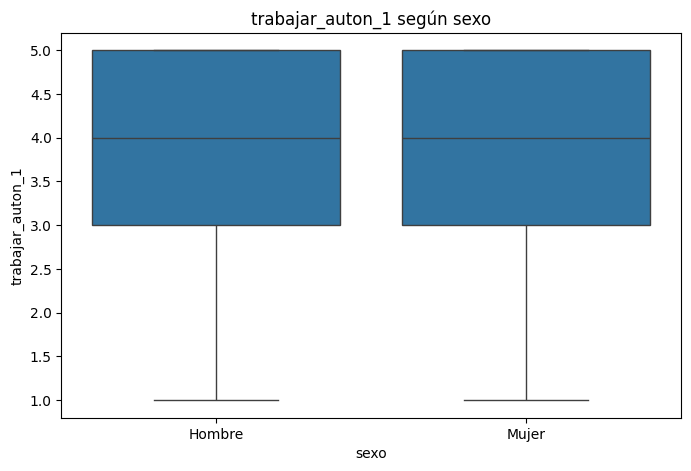

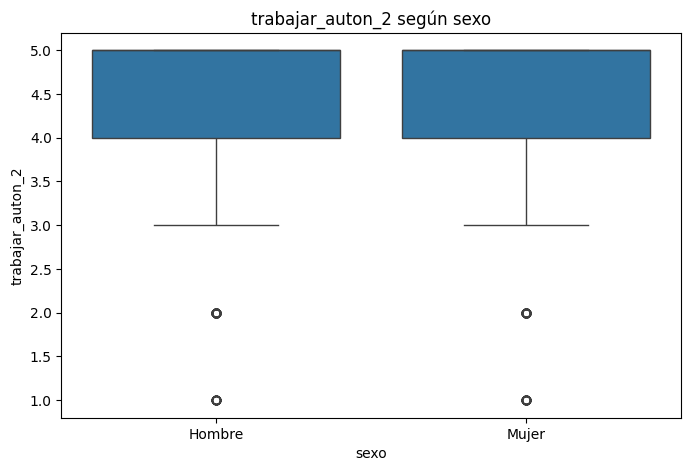

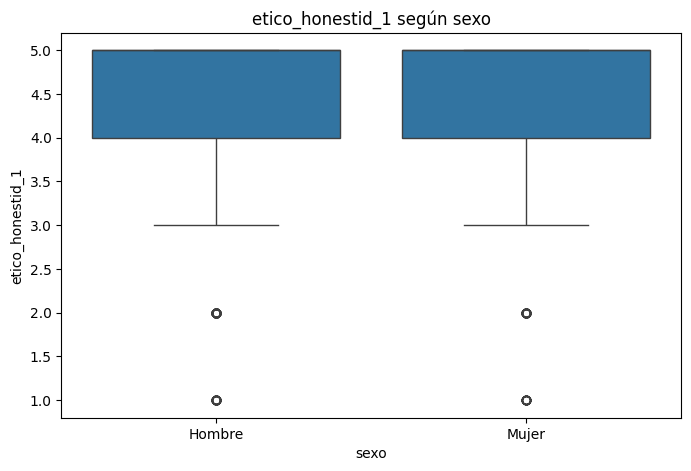

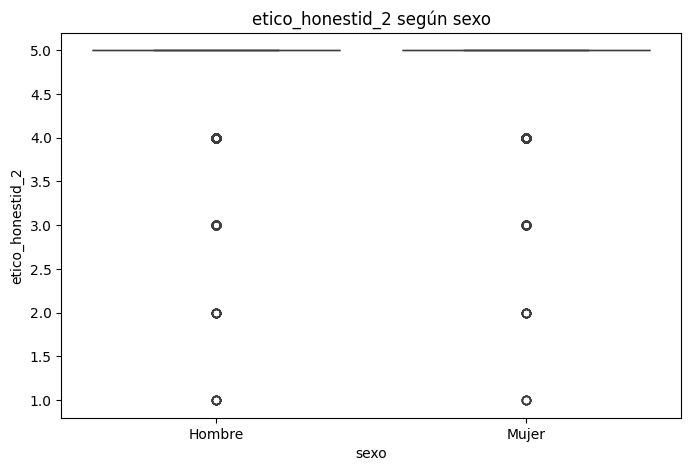

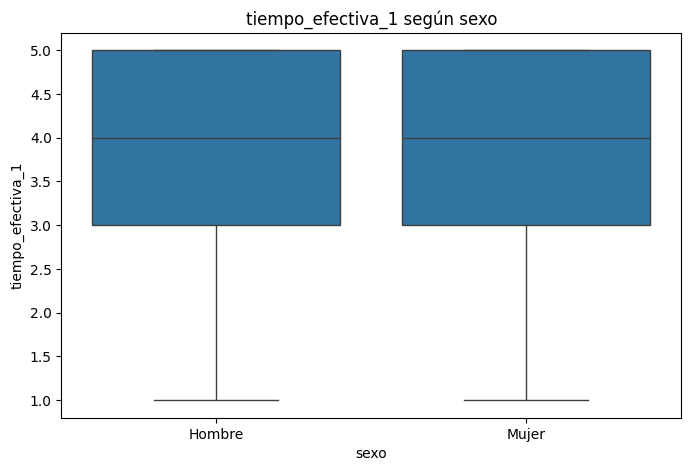

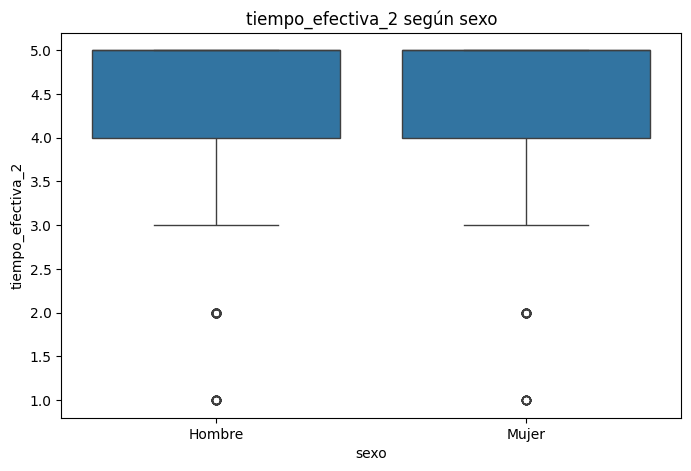

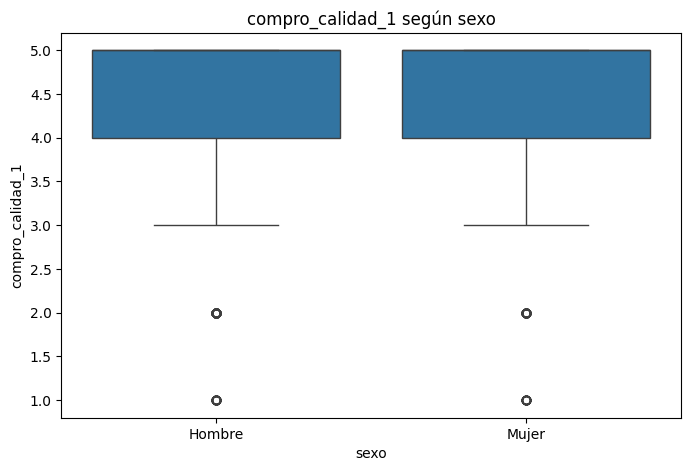

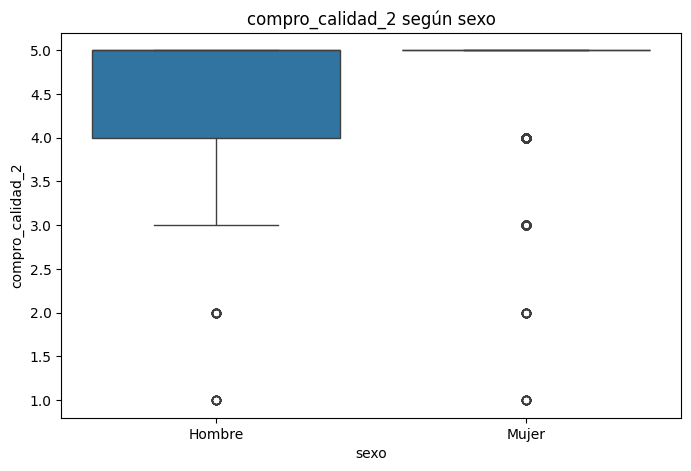

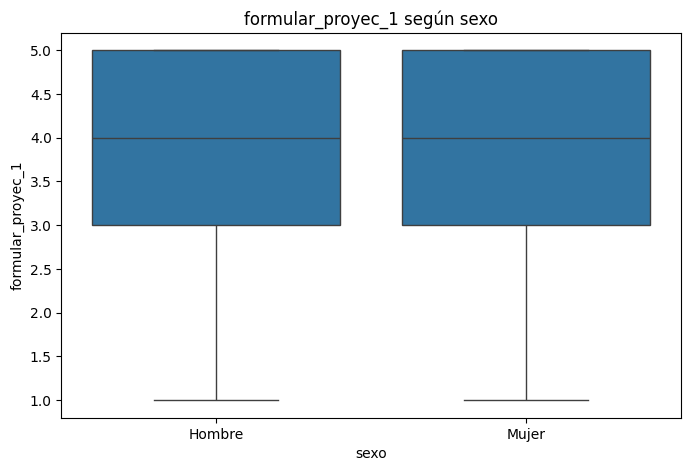

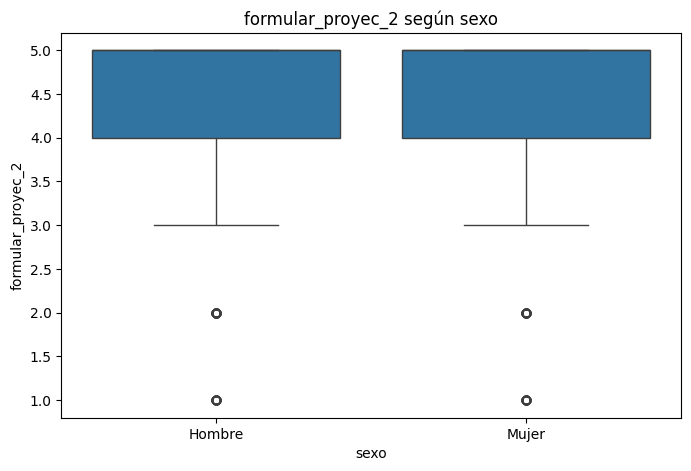

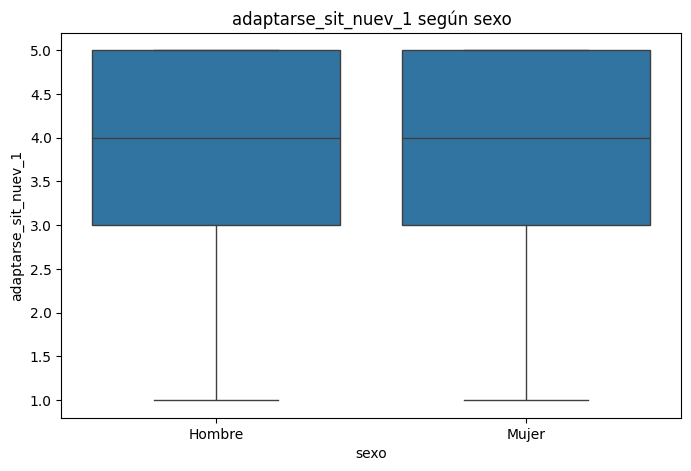

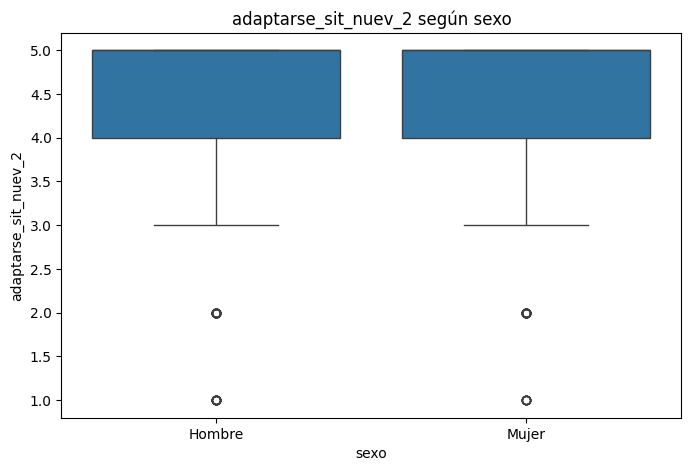

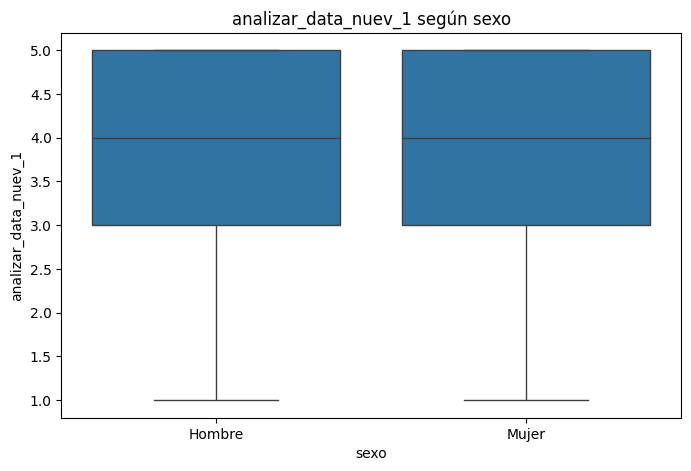

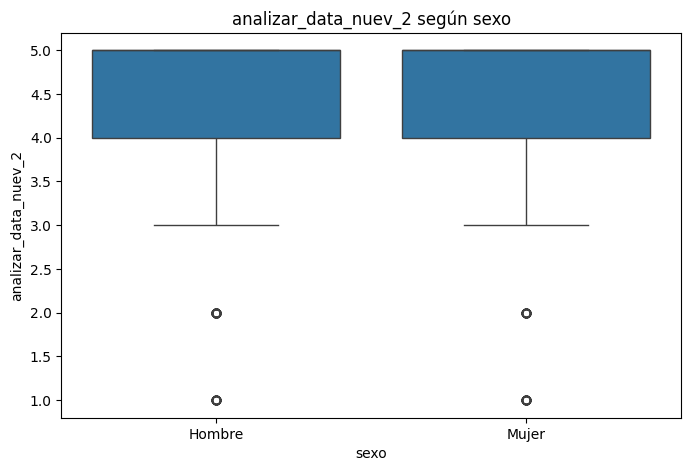

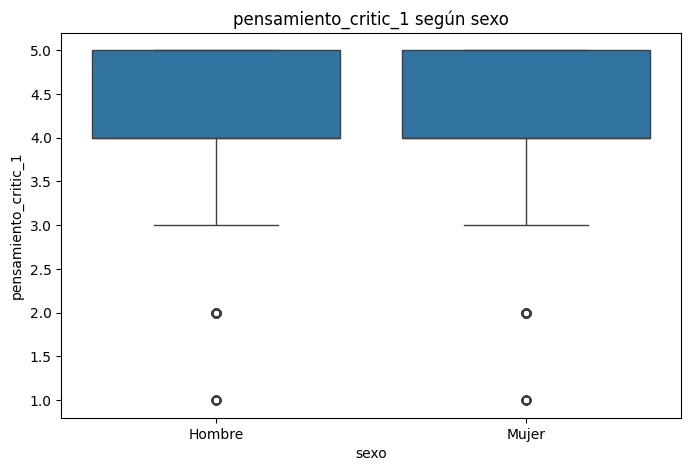

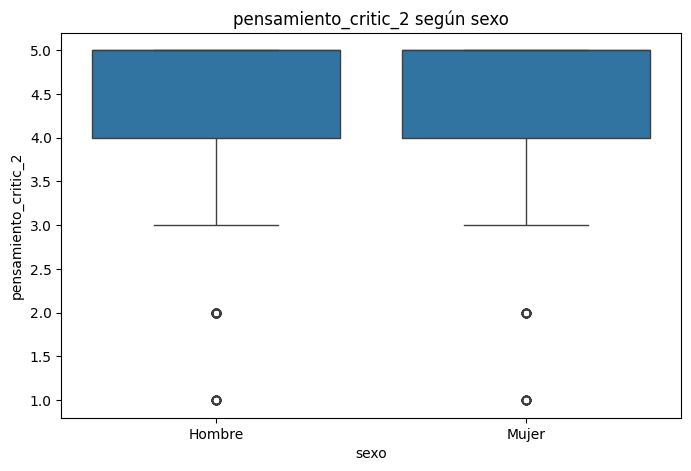

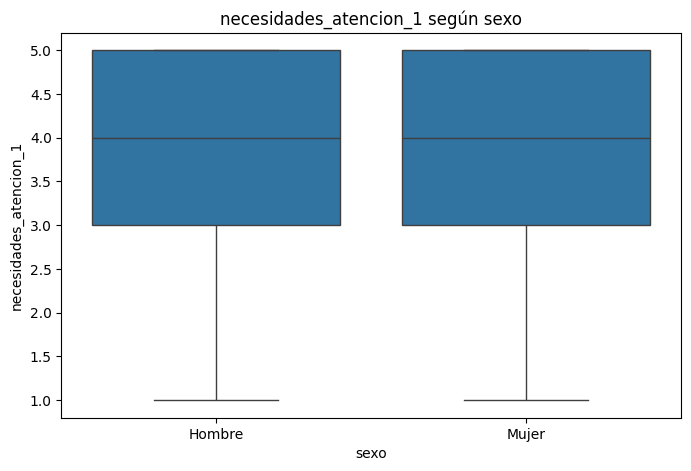

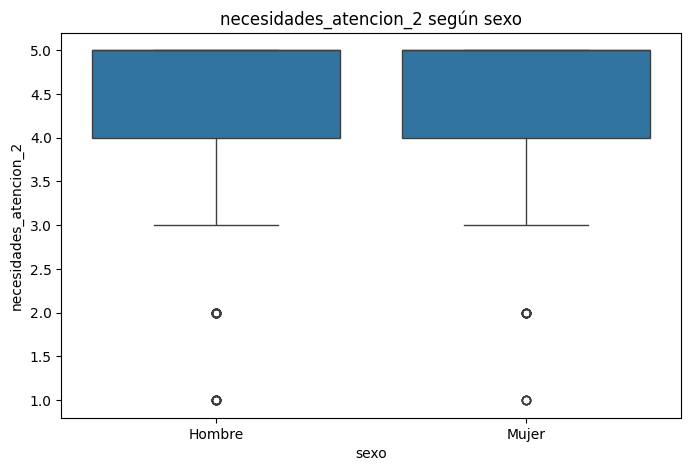

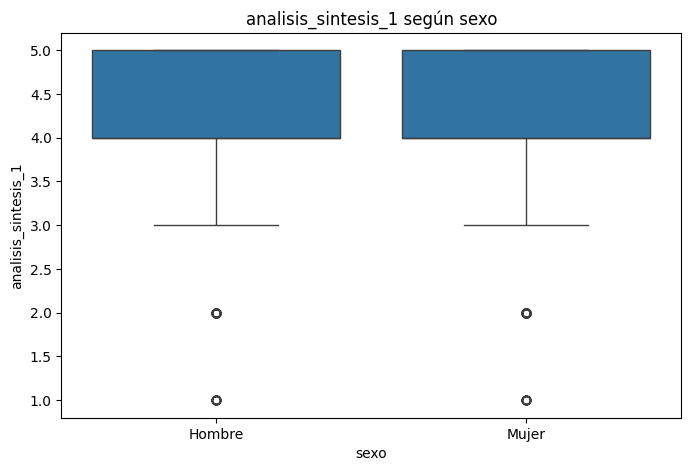

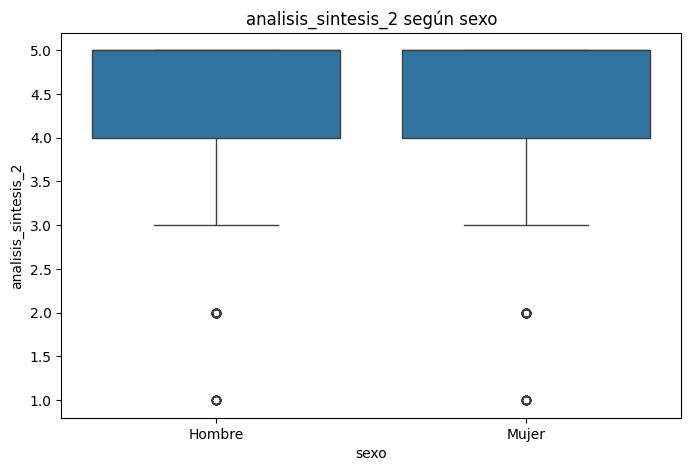

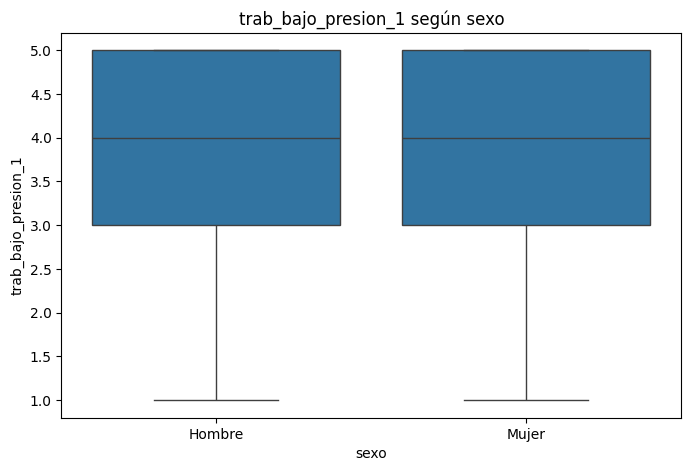

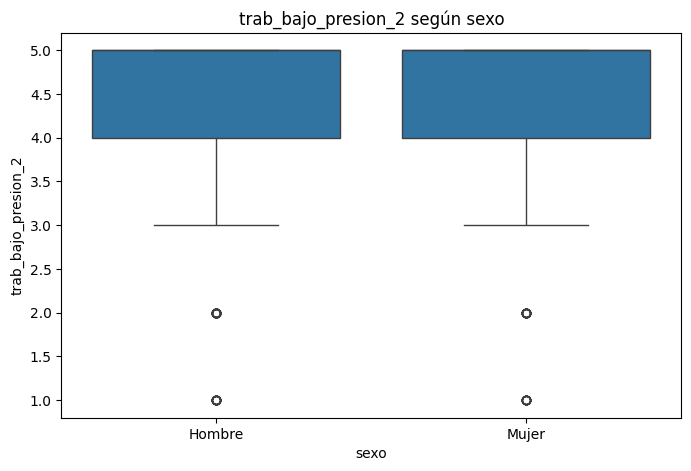

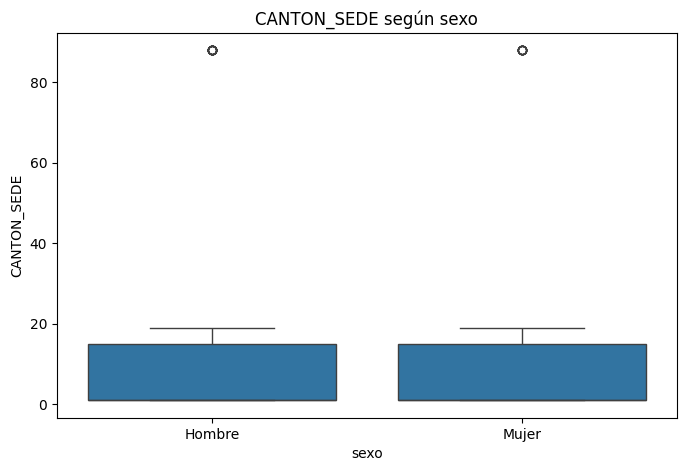

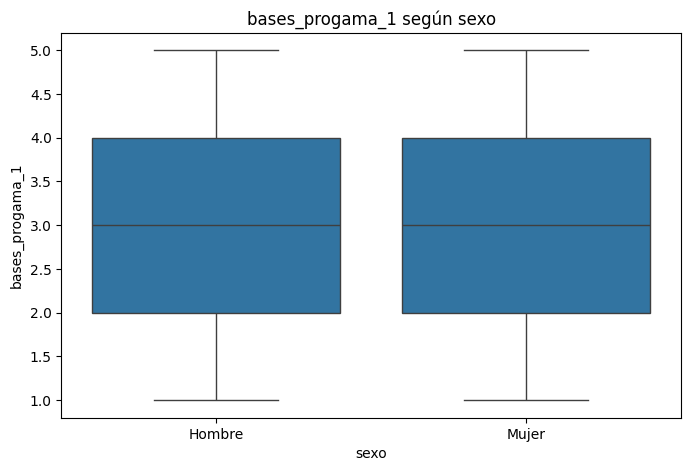

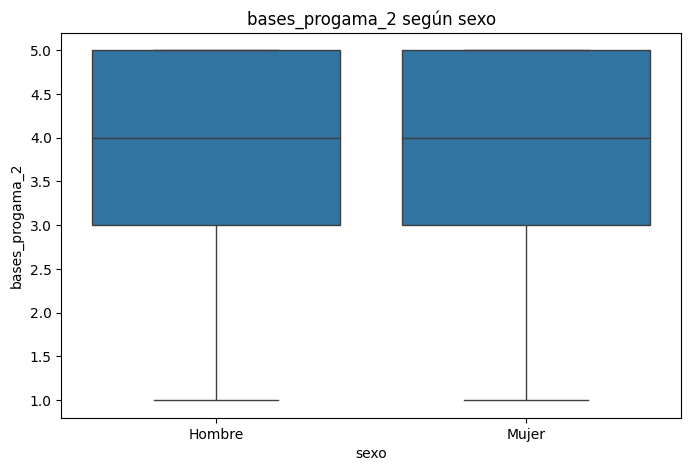

In [7]:
# Cambiar 'sexo' o 'tipo_trabajo' por tus variables categóricas
for col in num_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='sexo', y=col)
    plt.title(f"{col} según sexo")
    plt.show()


## Verificar nulos y tipos de datos

In [8]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Columns: 110 entries, anio_graduacion to bases_progama_2
dtypes: float64(67), int64(4), object(39)
memory usage: 5.9+ MB
None
anio_graduacion           0
grado_academico           0
disciplina                0
ingresos                  0
relacion_estudios      5346
                       ... 
trab_bajo_presion_2    2904
CANTON_SEDE            4580
G11_Otro               5384
bases_progama_1        5203
bases_progama_2        5203
Length: 110, dtype: int64


In [11]:
# Calcular porcentaje de valores nulos por variable
porcentaje_nulos = df.isnull().mean().round(3)

# Filtrar las variables con más del 30% de nulos
variables_con_muchos_nulos = porcentaje_nulos[porcentaje_nulos > 0.30]

# Mostrar nombres y porcentaje
print("Variables con más del 30% de valores faltantes:")
print(variables_con_muchos_nulos.sort_values(ascending=False))


Variables con más del 30% de valores faltantes:
G11_Otro                  0.764
relacion_estudios         0.759
bases_progama_1           0.738
bases_progama_2           0.738
A6_1_3                    0.694
A6_1_1                    0.694
A6_1_2                    0.694
A6_1_4                    0.694
tiem_1trab_relac          0.682
G51                       0.663
CANTON_SEDE               0.650
busc_trab_relac           0.607
B6_1                      0.447
B6_2                      0.447
B6_3                      0.447
B6_4                      0.447
etico_honestid_2          0.412
tiempo_efectiva_1         0.412
tiempo_efectiva_2         0.412
etico_honestid_1          0.412
satisf_trab_actual        0.412
trabajar_auton_1          0.412
trabajar_auton_2          0.412
formular_proyec_2         0.412
formular_proyec_1         0.412
compro_calidad_2          0.412
compro_calidad_1          0.412
adaptarse_sit_nuev_1      0.412
adaptarse_sit_nuev_2      0.412
analizar_data_nuev_1    